In [1]:
import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *
import numpy as np
import os

In [2]:
'''
#!pip install livelossplot
!python -m pip install --upgrade pip
%matplotlib inline
!pip install Livelossplot
'''

'\n#!pip install livelossplot\n!python -m pip install --upgrade pip\n%matplotlib inline\n!pip install Livelossplot\n'

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#!pip install livelossplot
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#!pip install Livelossplot
#from Livelossplot import PlotLossesKeras

from glob import glob
import os
import shutil

import numpy as np
import pandas as pd
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
sampling_seed=0
size_4_training=78786
size_4_training_0=198738
size_4_training_1=78786
epoch_4_test=60
img_size=50
#training_reshape=(-1, img_size, img_size, 3)

# **Loading Training Files**

I have converted all images to numpy array to boost speed

In [ ]:
os.makedirs('C:\\2023\\train_seg\\idc-minus\\')     
os.makedirs('C:\\2023\\/train_seg\\idc-plus\\')  
os.makedirs('C:\\2023\\/test_seg\\idc-minus\\')     
os.makedirs('C:\\2023\\/test_seg\\idc-plus\\')  
os.makedirs('C:\\2023\\/val_seg\\idc-minus\\')     
os.makedirs('C:\\2023\\/val_seg\\idc-plus\\')  
os.mkdir('C:\\2023\\History')


KeyboardInterrupt



In [5]:
import random
from sklearn.model_selection import train_test_split

import shutil
from glob import glob 
#make directory for labelling

train_dir='C:\\2023train_seg\\'
validation_dir='C:\\2023val_seg\\'
#train_dir='../working/data/train_seg/'  
#test_dir = '../working/data/test_seg/normal'  
test_dir = 'C:\\2023\\test_seg\\'   

class0 = [] # 0 = idc+
class1 = [] # 1 = idc-
imagePatches = glob('D:\\WorkSpace\\Data\\BHI_dataset\\**\\*.png', recursive=True)
for filename in imagePatches:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
        class1.append(filename)

print(class0[0:10])

#sampling 10000 images from class 0 and class 1 to train the model

random.seed(sampling_seed)
class0sample=random.sample(class0,size_4_training_0)
class0label=np.zeros(size_4_training_0)
class1sample=random.sample(class1,size_4_training_1)
class1label=np.ones(size_4_training_1)

class0sample_train, class0sample_test1, class0label_train, class0label_test1 = train_test_split(class0sample, class0label, test_size=0.3, random_state=42)
class0sample_val, class0sample_test, class0label_val, class0label_test = train_test_split(class0sample_test1, class0label_test1, test_size=0.3, random_state=42)
print(len(class0sample_train))
print(len(class0sample_test))
print(len(class0sample_val))
class1sample_train, class1sample_test1, class1label_train, class1label_test1 = train_test_split(class1sample, class1label, test_size=0.3, random_state=42)
class1sample_val, class1sample_test, class1label_val, class1label_test = train_test_split(class1sample_test1, class1label_test1, test_size=0.3, random_state=42)
print(len(class1sample_train))
print(len(class1sample_test))
print(len(class1sample_val))
def read_and_save_data(path, file_name_array):
    j=0
    for i in file_name_array:
        if i.endswith('.png'):
          
            
            #second copy method
            head, tail = os.path.split(i)
            outputname=str(path+tail)
            #outputname=str(path+str(j)+'.png')
            #print(outputname)
            shutil.copy(i, outputname)
   
            #print(status2)
            
            j=j+1
            if j==120000:
                break
            
   
class0train_path='C:\\2023\\train_seg\\idc-minus\\'
class1train_path='C:\\2023\\train_seg\\idc-plus\\'
class0test_path='C:\\2023\\test_seg\\idc-minus\\'
class1test_path='C:\\2023\\test_seg\\idc-plus\\'
class0val_path='C:\\2023\\val_seg\\idc-minus\\'
class1val_path='C:\\2023\\val_seg\\idc-plus\\'

# read_and_save_data(class0train_path,class0sample_train)
# read_and_save_data(class1train_path,class1sample_train)


# read_and_save_data(class0test_path,class0sample_test)
# read_and_save_data(class1test_path,class1sample_test)


# read_and_save_data(class0val_path,class0sample_val)
# read_and_save_data(class1val_path,class1sample_val)

['D:\\WorkSpace\\Data\\BHI_dataset\\10253\\0\\10253_idx5_x1001_y1001_class0.png', 'D:\\WorkSpace\\Data\\BHI_dataset\\10253\\0\\10253_idx5_x1001_y1051_class0.png', 'D:\\WorkSpace\\Data\\BHI_dataset\\10253\\0\\10253_idx5_x1001_y1101_class0.png', 'D:\\WorkSpace\\Data\\BHI_dataset\\10253\\0\\10253_idx5_x1001_y1151_class0.png', 'D:\\WorkSpace\\Data\\BHI_dataset\\10253\\0\\10253_idx5_x1001_y1201_class0.png', 'D:\\WorkSpace\\Data\\BHI_dataset\\10253\\0\\10253_idx5_x1001_y1251_class0.png', 'D:\\WorkSpace\\Data\\BHI_dataset\\10253\\0\\10253_idx5_x1001_y1301_class0.png', 'D:\\WorkSpace\\Data\\BHI_dataset\\10253\\0\\10253_idx5_x1001_y1351_class0.png', 'D:\\WorkSpace\\Data\\BHI_dataset\\10253\\0\\10253_idx5_x1001_y1501_class0.png', 'D:\\WorkSpace\\Data\\BHI_dataset\\10253\\0\\10253_idx5_x1001_y1551_class0.png']
139116
17887
41735
55150
7091
16545


In [6]:
import os #Operating System
import sys #System
# train_generator = train_datagen.flow(x_train, y_train, batch_size =)
# val_generator = val_datagen.flow(x_val, y_val, batch_size = 64)
# test_generator=test_datagen.flow(x_test,y_test,batch_size = 64)


In [7]:
import os
import cv2
def readImage(path, tag):
    j=0
    image_data = []
    label=[]
    for i in os.listdir(path):
        imgname=path+i
        #print(imgname)
        img = cv2.imread(imgname, cv2.IMREAD_COLOR)
        img_resized = cv2.resize(img, (img_size,img_size), interpolation=cv2.INTER_LINEAR)
        image_data.append(img_resized)
        label.append(tag)
        #print(img[1])
        j=j+1
        #if j==10:
        #    break
        
    return image_data, label

import numpy as np
from tensorflow.keras.utils import *
from sklearn.utils import shuffle

class0_train, train0_label = readImage(class0train_path, 0)
class1_train, train1_label  = readImage(class1train_path, 1)
class0_test, test0_label = readImage(class0test_path, 0)
class1_test, test1_label = readImage(class1test_path, 1)
class0_val, val0_label = readImage(class0val_path, 0)
class1_val, val1_label = readImage(class1val_path, 1)

def Image_array_process(class0array,label0, class1array, label1):
    class0_array=np.array(class0array)
    class1_array=np.array(class1array)
    combined_data = np.concatenate((class0_array, class1_array))
    combined_label= np.concatenate((label0,label1), axis=0)
    assert len(combined_data) == len(combined_label)
    combined_data, combined_label = shuffle(combined_data, combined_label, random_state=0)
    print(combined_data.shape)
    length=len(combined_data)
    combined_label=to_categorical(combined_label,num_classes=2)
    #i=0
    #for i in range(length):
    #    print(combined_label[i])



    #print(class0_array.shape)
    #print(combined_data.shape)
    '''
    training_reshape=(224,224,3)
    length=len(combined_data)
    print(length)
    x =[None]*length
    #print(img_data.type)
    y =np.zeros(length)
    i=0
   
    for features,label in combined_data:
        x[i]=features
        #print(x.shape)
        y[i]=label
        #print(y[i])
        i=i+1
    
            #x = np.array(x).reshape(training_reshape)
    x = np.array(x)    
    #print(x.shape)
    #y=np.array(y)
    y=y.astype(int)
    y = to_categorical(y)
    print(y)
    '''  
    return combined_data, combined_label


X_train, y_train=Image_array_process(class0_train, train0_label, class1_train, train1_label)
X_test, y_test=Image_array_process(class0_test, test0_label, class1_test, test1_label)
X_val, y_val=Image_array_process(class0_val, val0_label, class1_val, val1_label)

(147314, 50, 50, 3)
(24396, 50, 50, 3)
(55272, 50, 50, 3)


In [8]:
'''
import numpy as np


class0_array = readImage(class0path, 0)
class1_array = readImage(class1path, 1)

class0_array=np.array(class0_array)
class1_array=np.array(class1_array)
combined_data = np.concatenate((class0_array, class1_array))
random.seed(41)
random.shuffle(combined_data)
print(class0_array.shape)
print(class1_array.shape)

X = []
y = []

for features,label in combined_data:
    X.append(features)
    y.append(label)
#print(X.shape)
#print(y.shape)

# reshape X data
train_data = np.array(X).reshape(training_reshape)
train_label=np.array(y)
print(y[19990:19999])
print(train_data.shape)
print(train_label.shape)
'''

'\nimport numpy as np\n\n\nclass0_array = readImage(class0path, 0)\nclass1_array = readImage(class1path, 1)\n\nclass0_array=np.array(class0_array)\nclass1_array=np.array(class1_array)\ncombined_data = np.concatenate((class0_array, class1_array))\nrandom.seed(41)\nrandom.shuffle(combined_data)\nprint(class0_array.shape)\nprint(class1_array.shape)\n\nX = []\ny = []\n\nfor features,label in combined_data:\n    X.append(features)\n    y.append(label)\n#print(X.shape)\n#print(y.shape)\n\n# reshape X data\ntrain_data = np.array(X).reshape(training_reshape)\ntrain_label=np.array(y)\nprint(y[19990:19999])\nprint(train_data.shape)\nprint(train_label.shape)\n'

In [9]:
'''
label_normal = np.zeros(len(normal))
label_bacterial = np.ones(len(bacterial))
label_viral = np.full(len(viral),2, dtype = int)
train_data = np.concatenate((normal,bacterial,viral),axis=0)
train_label = np.concatenate((label_normal,label_bacterial,label_viral),axis=0)
train_label.shape, train_data.shape
'''

'\nlabel_normal = np.zeros(len(normal))\nlabel_bacterial = np.ones(len(bacterial))\nlabel_viral = np.full(len(viral),2, dtype = int)\ntrain_data = np.concatenate((normal,bacterial,viral),axis=0)\ntrain_label = np.concatenate((label_normal,label_bacterial,label_viral),axis=0)\ntrain_label.shape, train_data.shape\n'

In [10]:
'''
#!pip install sklearn
from sklearn.model_selection import train_test_split
train_data, test1_data, train_label, test1_label = train_test_split(train_data, train_label, test_size=0.3, random_state=42)
val_data, test_data, val_label, test_label = train_test_split(test1_data, test1_label, test_size=0.3, random_state=42)
'''

'\n#!pip install sklearn\nfrom sklearn.model_selection import train_test_split\ntrain_data, test1_data, train_label, test1_label = train_test_split(train_data, train_label, test_size=0.3, random_state=42)\nval_data, test_data, val_label, test_label = train_test_split(test1_data, test1_label, test_size=0.3, random_state=42)\n'

In [11]:
train_data=X_train
train_label=y_train

test_data=X_test
test_label=y_test

val_data=X_val
val_label=y_val

## Visualization

In [12]:
import matplotlib.pyplot as plt

### Normal

In [13]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(normal[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
       '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(normal[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n      "

# Viral

In [14]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(viral[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(viral[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

## Bacterial

In [15]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(bacterial[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(bacterial[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

# Loading Test Data

In [16]:
'''
test_normal = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Normal_128.npy')
test_viral = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Virus_128.npy')
test_bacterial = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_bacteria_128.npy')

test_normal.shape, test_viral.shape , test_bacterial.shape

label_test_normal = np.zeros(len(test_normal))
label_test_bacterial = np.ones(len(test_bacterial))
label_test_viral = np.full(len(test_viral),2, dtype = int)

test_data.shape
'''

"\ntest_normal = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Normal_128.npy')\ntest_viral = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Virus_128.npy')\ntest_bacterial = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_bacteria_128.npy')\n\ntest_normal.shape, test_viral.shape , test_bacterial.shape\n\nlabel_test_normal = np.zeros(len(test_normal))\nlabel_test_bacterial = np.ones(len(test_bacterial))\nlabel_test_viral = np.full(len(test_viral),2, dtype = int)\n\ntest_data.shape\n"

## Visualization

## Normal

In [17]:
 '''

n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(test_normal[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\n\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(test_normal[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

## Viral

In [18]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(test_viral[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(test_viral[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

## Bacterial

In [19]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(test_bacterial[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(test_bacterial[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

**Label encode**

In [20]:
'''
from tensorflow.keras.utils import to_categorical
y_label=train_label
train_label = to_categorical(train_label, num_classes= 2)
test_label  = to_categorical(test_label, num_classes = 2)
'''

'\nfrom tensorflow.keras.utils import to_categorical\ny_label=train_label\ntrain_label = to_categorical(train_label, num_classes= 2)\ntest_label  = to_categorical(test_label, num_classes = 2)\n'

# Dealing with Class Imbalance

In [21]:
'''
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)
print(class_weights)

weights = {i : class_weights[i] for i in range(5)}
#five will give an error
#weights = {l:c for l,c in zip(np.unique(y_label), class_weights)}
print(weights)
'''

"\nfrom sklearn.utils.class_weight import compute_class_weight\nclass_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)\nprint(class_weights)\n\nweights = {i : class_weights[i] for i in range(5)}\n#five will give an error\n#weights = {l:c for l,c in zip(np.unique(y_label), class_weights)}\nprint(weights)\n"

In [22]:
'''
from sklearn.utils import class_weight
weight = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)
weight = {i : weight[i] for i in range(2)}
#the 2 must be equal to classes no
print(weight)

'''

"\nfrom sklearn.utils import class_weight\nweight = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)\nweight = {i : weight[i] for i in range(2)}\n#the 2 must be equal to classes no\nprint(weight)\n\n"

# [CovXNet: A multi-dilation convolutional neural network for automatic COVID-19 and other pneumonia detection from chest X-ray images with transferable multi-receptive feature optimization](https://www.sciencedirect.com/science/article/pii/S0010482520302250)

#### Code:[here](https://github.com/Perceptron21/CovXNet)
## Residual & Shifter Unit:
![Residual & Shifter Unit](https://ars.els-cdn.com/content/image/1-s2.0-S0010482520302250-gr2.jpg)

## Model:
![Model](https://ars.els-cdn.com/content/image/1-s2.0-S0010482520302250-gr4.jpg)


## Residual Unit

In [23]:
def Residual_Unit(input_tensor, nb_of_input_channels, max_dilation, number_of_units):
    
  for i in range(number_of_units):
    x1 = Conv2D(nb_of_input_channels*2, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(input_tensor)
    x1 = BatchNormalization()(x1)
  
    a = []

    for i in range(1, max_dilation+1):
      temp = DepthwiseConv2D( kernel_size=(3,3), dilation_rate = (i,i), padding = 'same', activation= 'relu')(x1)
      temp = BatchNormalization()(temp)
      a.append(temp)

    x = Concatenate(axis= -1)(a)
    x = Conv2D(nb_of_input_channels, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(x)
    x = BatchNormalization()(x)

    x = Add()([x, input_tensor])

    input_tensor = x
  
  return x


## Shifter Unit

In [24]:
# Shifter Unit:

def Shifter_Unit(input_tensor, nb_of_input_channels, max_dilation):
    x1 = Conv2D(nb_of_input_channels*4, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(input_tensor)
    x1 = BatchNormalization()(x1)

    a = []

    for i in range(1, max_dilation+1):
      temp = DepthwiseConv2D( kernel_size=(3,3), dilation_rate = (i,i), padding = 'same', activation= 'relu')(x1)
      temp = MaxPool2D(pool_size=(2,2))(temp)
      temp = BatchNormalization()(temp)
      a.append(temp)

    x = Concatenate(axis= -1)(a)

    x = Conv2D(nb_of_input_channels*2, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(x)
    x = BatchNormalization()(x)

    return x

# Network128

In [25]:
from tensorflow.keras.optimizers import Adam

In [26]:
#Network:
  
def Network128(input_shape, nb_class, depth):
  xin = Input(shape= input_shape)

  x = Conv2D(16, kernel_size = (5,5), strides= (1,1), padding = 'same', activation='relu')(xin)
  x = BatchNormalization()(x)

  x = Conv2D(32, kernel_size = (3,3), strides= (2,2), padding = 'same', activation='relu')(x)
  x = BatchNormalization()(x)
  
##Max Dilation rate will be vary in the range (1,5). 

# Max Dilation rate is 5 for tensor (64x64x32)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=32, max_dilation=5, number_of_units=depth)
  x = Shifter_Unit(input_tensor=x, nb_of_input_channels=32, max_dilation=5)


# Max Dilation rate is 4 for (32x32x64)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=64, max_dilation=4, number_of_units=depth)
  x = Shifter_Unit(input_tensor=x, nb_of_input_channels=64, max_dilation=4)

# Max Dilation rate is 3 for (16x16x128)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=128, max_dilation=3, number_of_units=depth)
  x = Shifter_Unit(input_tensor=x, nb_of_input_channels=128, max_dilation=3)

# Max Dilation rate is 2 for (8x8x256)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=256, max_dilation=2, number_of_units=depth)

  x = GlobalAveragePooling2D()(x)
  #x = GlobalMaxPooling2D()(x)

  x = Dense(128, activation='relu')(x)
  x = Dense(64, activation='relu')(x)

  x = Dense(nb_class, activation= 'softmax')(x)

  model = Model(xin, x)

  model.compile(loss='categorical_crossentropy', optimizer = Adam(lr = 1e-3), metrics = ['accuracy'])

  return model

# Custom Callback

In [27]:
# plot confusion matrix

import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas.util.testing as tm
from sklearn import metrics
import seaborn as sns
sns.set()

plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          save = False):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(b=False)
    if save == True:
      plt.savefig('Confusion Matrix.png', dpi = 900)

In [28]:
# test model performance
from datetime import datetime
import matplotlib.pyplot as plt


def test_model(model, test_generator, y_test, class_labels, cm_normalize=True, \
                 print_cm=True):
    
    # BS = 16
    results = dict()
    
    # n = len(testy)// BS

    # testX = testX[:BS*n]
    # testy = testy[:BS*n]

    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred_original = model.predict_generator(test_generator,verbose=1)
    # y_pred = (y_pred_original>0.5).astype('int')

    y_pred = np.argmax(y_pred_original, axis = 1)
    # y_test = np.argmax(testy, axis= 1)
    #y_test = np.argmax(testy, axis=-1)
    
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
    y_test = y_test.astype(int) # sparse form not categorical
    

    # balanced_accuracy
    from sklearn.metrics import balanced_accuracy_score
    balanced_accuracy = balanced_accuracy_score(y_true=y_test, y_pred=y_pred)
    print('---------------------')
    print('| Balanced Accuracy  |')
    print('---------------------')
    print('\n    {}\n\n'.format(balanced_accuracy))

    
    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    

    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred, digits=6)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(6,4))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix')
    plt.show()
    

    
    # add the trained  model to the results
    results['model'] = model
    
    return


from keras.callbacks import Callback
class MyLogger(Callback):
  
  def __init__(self, test_generator, y_test, class_labels):
    super(MyLogger, self).__init__()
    self.test_generator = test_generator
    self.y_test = y_test
    self.class_labels = class_labels
    
  def on_epoch_end(self, epoch, logs=None):
    test_model(self.model, self.test_generator, self.y_test, self.class_labels)

In [29]:
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix

from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix

def test_final_model(model, train_generator, test_generator, val_generator, y_train, y_test, y_val, class_labels, cm_normalize=True, \
                 print_cm=True):
    
    # BS = 16
    results = dict()
    
    # n = len(testy)// BS

    # testX = testX[:BS*n]
    # testy = testy[:BS*n]

    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred_test_original = model.predict_generator(test_generator,verbose=1)
    # y_pred = (y_pred_test>0.5).astype('int')

    y_pred_test = np.argmax(y_pred_test_original, axis = 1)
    
    y_train = y_train.astype(int) # sparse form not categorical
    y_val = y_val.astype(int) # sparse form not categorical
    # y_test = np.argmax(testy, axis= 1)
    #y_test = np.argmax(testy, axis=-1)
    
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred_test
    y_test = y_test.astype(int) # sparse form not categorical
    

    # balanced_accuracy
    from sklearn.metrics import balanced_accuracy_score
    balanced_accuracy = balanced_accuracy_score(y_true=y_test, y_pred=y_pred_test)
    print('---------------------')
    print('| Balanced Accuracy  |')
    print('---------------------')
    print('\n    {}\n\n'.format(balanced_accuracy))

    
    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    

    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred_test, digits=6)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred_test)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(6,4))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix')
    plt.show()
    

    
    # add the trained  model to the results
    results['model'] = model
    print("calculate other score")
    print("predicting validation data")

    #calculate other score
    y_pred_val_original = model.predict_generator(val_generator,verbose=1)
    # y_pred = (y_pred_val>0.5).astype('int')

    y_pred_val = np.argmax(y_pred_val_original, axis = 1)
    # y_val = np.argmax(valy, axis= 1)
    #y_val = np.argmax(valy, axis=-1)
    print("predicting test data")
    y_pred_train_original = model.predict_generator(train_generator,verbose=1)
    # y_pred = (y_pred_train>0.5).astype('int')

    y_pred_train = np.argmax(y_pred_train_original, axis = 1)
    # y_train = np.argmax(trainy, axis= 1)
    #y_train = np.argmax(trainy, axis=-1)
    
    print("Train accuracy Score------------>")
    print ("{0:.3f}".format(accuracy_score(y_train, y_pred_train)*100), "%")
    
    print("Val accuracy Score--------->")
    
    print("{0:.3f}".format(accuracy_score(y_val, y_pred_val)*100), "%")
    

    
  
    print("Test accuracy Score--------->")
    print("{0:.3f}".format(accuracy_score(y_test, y_pred_test)*100), "%")
    
    print("F1 Score--------------->")
    print("{0:.3f}".format(f1_score(y_test, y_pred_test, average = 'weighted')*100), "%")
    
    print("Cohen Kappa Score------------->")
    print("{0:.3f}".format(cohen_kappa_score(y_test, y_pred_test)*100), "%")
    
    print("Recall-------------->")
    print("{0:.3f}".format(recall_score(y_test, y_pred_test, average = 'weighted')*100), "%")
    
    print("Precision-------------->")
    print("{0:.3f}".format(precision_score(y_test, y_pred_test, average = 'weighted')*100), "%")
    
    cf_matrix_test = confusion_matrix(y_test, y_pred_test)
    cf_matrix_val = confusion_matrix(y_val, y_pred_val)
    
    plt.figure(figsize = (12, 6))
    plt.subplot(121)
    sns.heatmap(cf_matrix_val, annot=True, cmap='Blues')
    plt.title("Val Confusion matrix")
    
    plt.subplot(122)
    sns.heatmap(cf_matrix_test, annot=True, cmap='Blues')
    plt.title("Test Confusion matrix")
    
    plt.show()
    
    
    return

# One Hot Encoding the labels

# ImageDataGenerator

In [30]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import *


#train_datagen2 = ImageDataGenerator(rescale = 1/255)

train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1,
                                  fill_mode = 'constant',
                                  zoom_range = 0.1,
                                  rotation_range = 20)

val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
val2_datagen = ImageDataGenerator(rescale = 1.0/255.0)

train_generator = train_datagen.flow(train_data,
                                     train_label, 
                                     batch_size = 16, 
                                     shuffle = False)

val_generator = val_datagen.flow(test_data,
                                 test_label,
                                 batch_size = 16,
                                 shuffle = False)
val2_generator = val_datagen.flow(val_data,
                                 val_label,
                                 batch_size = 16,
                                 shuffle = False)

# Vizualization After Augmentation

In [31]:
#get the first patch for visualization
images, labels = train_generator.next()

In [32]:
#get the augmented data
#train_data1=np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
train_label1=np.concatenate([train_generator.next()[1] for i in range(train_generator.__len__())])
#print(train_data1.shape)
print(train_label1.shape)
#print(y)

(147314, 2)


100%|██████████| 3/3 [00:00<00:00, 843.47it/s]


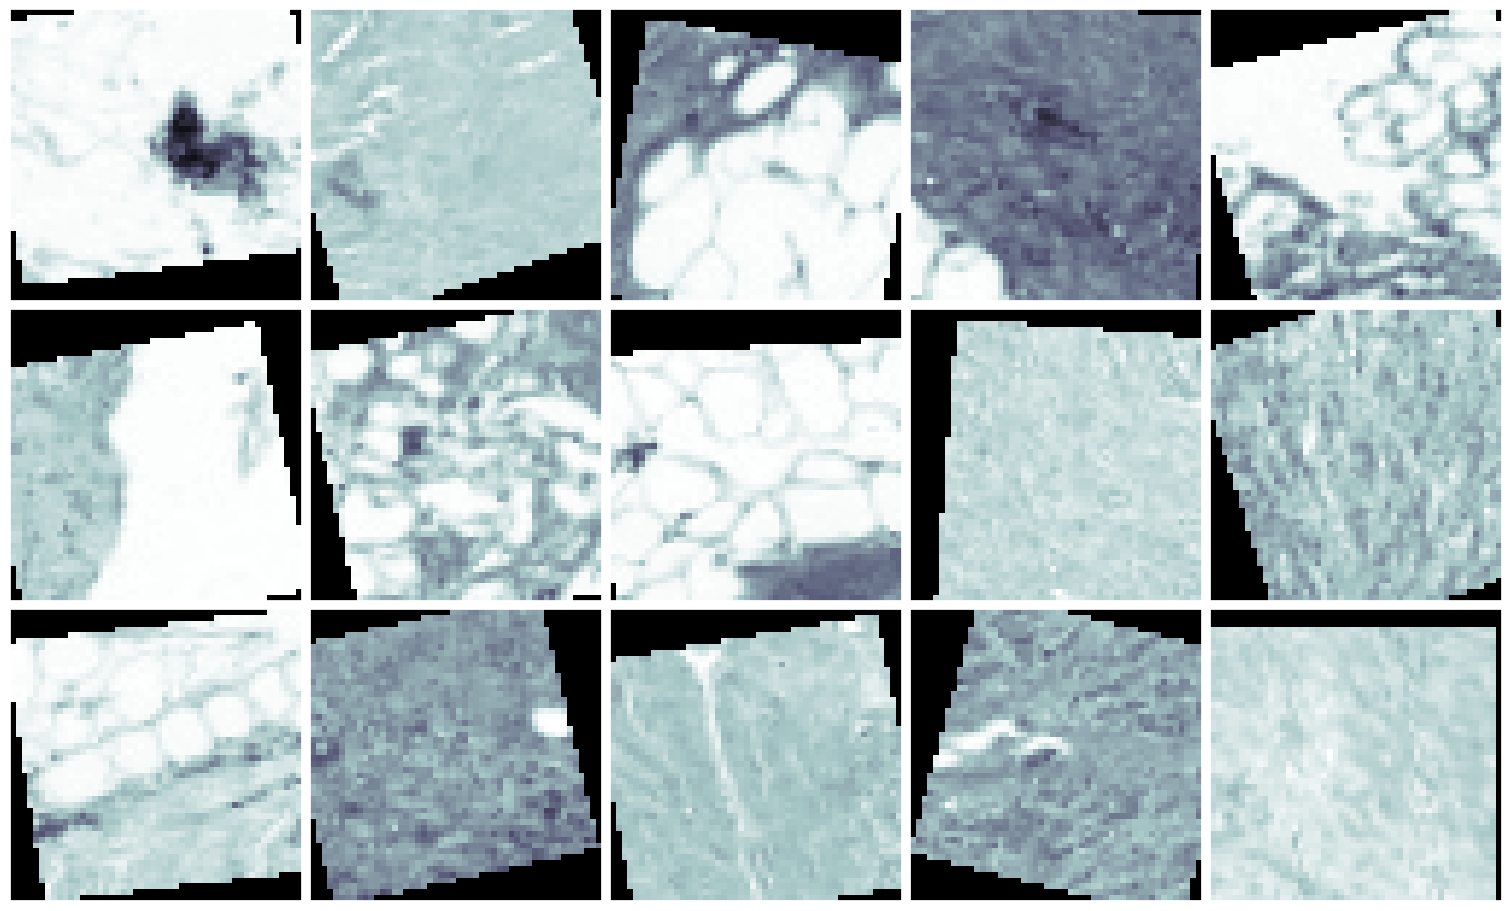

In [33]:
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(images[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

# Callback

In [34]:
#os.mkdir('Model')


In [35]:
#os.mkdir('History')
def get_callbacks():
    
#    filepath = './Model/best_model_multiclass_128.hdf5'
    filepath = 'best_model_multiclass_128.h5'
    callback1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    #callback1 = ModelCheckpoint(filepath, verbose=1, save_best_only=True, mode='min')
    callback2 = MyLogger(val_generator, 
                         y_test = np.argmax(test_label, axis = 1),
                         class_labels = ['idc-', 'idc+'])
    
    callback3 = CSVLogger('C:\\2023\\History\\Multiclass_Log_128.csv')

    return [callback1 ,callback2, callback3]

# Training

In [36]:
model = Network128(input_shape = (img_size, img_size, 3), nb_class = 2, depth = 5)
model.summary() 

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50, 50, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 50, 50, 16)   1216        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 50, 50, 16)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 25, 25, 32)   4640        batch_normalization[0][0]        
______________________________________________________________________________________________

# Plotting Model

In [37]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


Epoch 1/60
9207/9207 [==============================] - 1452s 156ms/step - loss: 0.4225 - accuracy: 0.8161 - val_loss: 0.4007 - val_accuracy: 0.8338

Epoch 00001: val_accuracy improved from -inf to 0.83378, saving model to best_model_multiclass_128.h5
Predicting test data
1525/1525 [==============================] - 51s 33ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:51.355941


---------------------
| Balanced Accuracy  |
---------------------

    0.8136536344772921


---------------------
|      Accuracy      |
---------------------

    0.8338252172487293


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.903094  0.860299  0.881177     17473
           1   0.685073  0.767009  0.723729      6923

    accuracy                       0.833825     24396
   macro avg   0.794083  0.813654  0.802453     24396
weighted avg   0.841225  0.833825  0.836497     24396

--------------------
| C

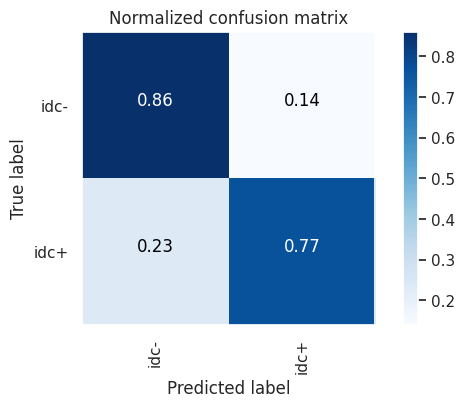

Epoch 2/60
9207/9207 [==============================] - 1447s 157ms/step - loss: 0.3744 - accuracy: 0.8391 - val_loss: 0.3517 - val_accuracy: 0.8508

Epoch 00002: val_accuracy improved from 0.83378 to 0.85080, saving model to best_model_multiclass_128.h5
Predicting test data
1525/1525 [==============================] - 53s 35ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:52.827602


---------------------
| Balanced Accuracy  |
---------------------

    0.7819802524154412


---------------------
|      Accuracy      |
---------------------

    0.8507952123298902


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.862976  0.941109  0.900350     17473
           1   0.807339  0.622851  0.703196      6923

    accuracy                       0.850795     24396
   macro avg   0.835158  0.781980  0.801773     24396
weighted avg   0.847187  0.850795  0.844403     24396

--------------------


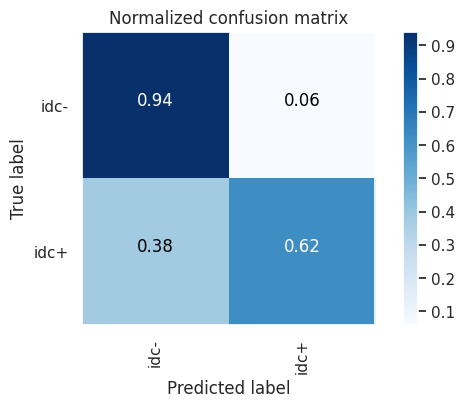

Epoch 3/60
9207/9207 [==============================] - 1154s 125ms/step - loss: 0.3397 - accuracy: 0.8558 - val_loss: 1.4063 - val_accuracy: 0.7517

Epoch 00003: val_accuracy did not improve from 0.85080
Predicting test data
1525/1525 [==============================] - 37s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.486709


---------------------
| Balanced Accuracy  |
---------------------

    0.5873441526700749


---------------------
|      Accuracy      |
---------------------

    0.7516396130513199


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.754913  0.967264  0.847997     17473
           1   0.715139  0.207425  0.321577      6923

    accuracy                       0.751640     24396
   macro avg   0.735026  0.587344  0.584787     24396
weighted avg   0.743626  0.751640  0.698611     24396

--------------------
| Confusion Matrix |
--------------------

 [[1690

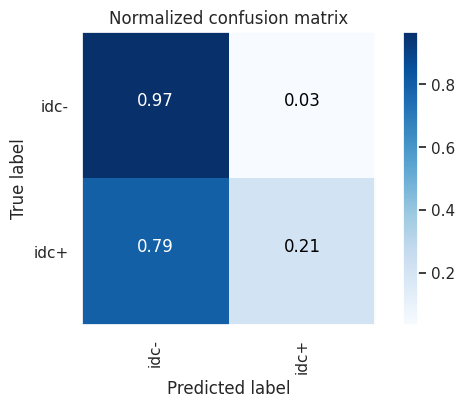

Epoch 4/60
9207/9207 [==============================] - 1090s 118ms/step - loss: 0.3195 - accuracy: 0.8648 - val_loss: 0.2979 - val_accuracy: 0.8743

Epoch 00004: val_accuracy improved from 0.85080 to 0.87430, saving model to best_model_multiclass_128.h5
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.105663


---------------------
| Balanced Accuracy  |
---------------------

    0.8495571289746813


---------------------
|      Accuracy      |
---------------------

    0.8743236596163305


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.916797  0.906828  0.911785     17473
           1   0.771123  0.792287  0.781562      6923

    accuracy                       0.874324     24396
   macro avg   0.843960  0.849557  0.846673     24396
weighted avg   0.875458  0.874324  0.874831     24396

--------------------


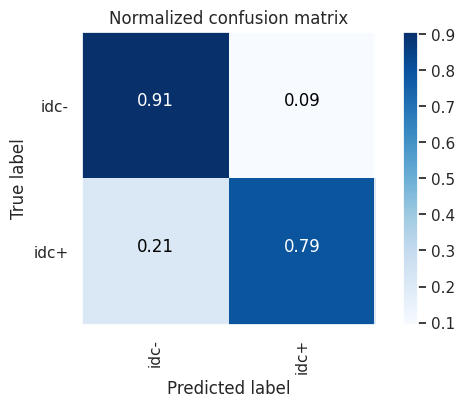

Epoch 5/60
9207/9207 [==============================] - 1103s 120ms/step - loss: 0.3069 - accuracy: 0.8705 - val_loss: 0.3176 - val_accuracy: 0.8766

Epoch 00005: val_accuracy improved from 0.87430 to 0.87660, saving model to best_model_multiclass_128.h5
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.638388


---------------------
| Balanced Accuracy  |
---------------------

    0.8421914592745429


---------------------
|      Accuracy      |
---------------------

    0.8765781275618953


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.907426  0.921708  0.914511     17473
           1   0.794224  0.762675  0.778130      6923

    accuracy                       0.876578     24396
   macro avg   0.850825  0.842191  0.846321     24396
weighted avg   0.875302  0.876578  0.875809     24396

--------------------


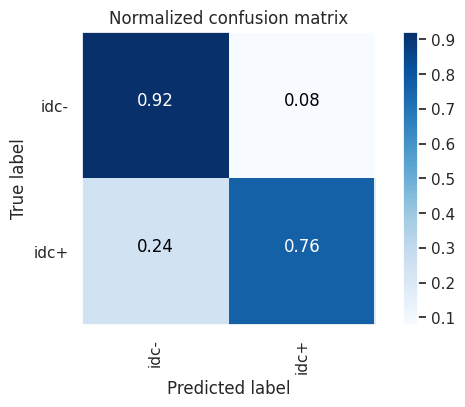

Epoch 6/60
9207/9207 [==============================] - 1092s 119ms/step - loss: 0.2981 - accuracy: 0.8749 - val_loss: 0.3089 - val_accuracy: 0.8711

Epoch 00006: val_accuracy did not improve from 0.87660
Predicting test data
1525/1525 [==============================] - 37s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.527220


---------------------
| Balanced Accuracy  |
---------------------

    0.8537790159298125


---------------------
|      Accuracy      |
---------------------

    0.8711264141662568


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.923709  0.893893  0.908557     17473
           1   0.752371  0.813665  0.781818      6923

    accuracy                       0.871126     24396
   macro avg   0.838040  0.853779  0.845187     24396
weighted avg   0.875088  0.871126  0.872591     24396

--------------------
| Confusion Matrix |
--------------------

 [[1561

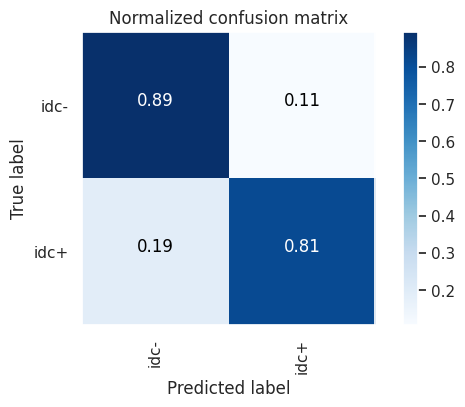

Epoch 7/60
9207/9207 [==============================] - 1093s 119ms/step - loss: 0.2910 - accuracy: 0.8777 - val_loss: 0.2812 - val_accuracy: 0.8853

Epoch 00007: val_accuracy improved from 0.87660 to 0.88533, saving model to best_model_multiclass_128.h5
Predicting test data
1525/1525 [==============================] - 37s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.453177


---------------------
| Balanced Accuracy  |
---------------------

    0.8714421314843621


---------------------
|      Accuracy      |
---------------------

    0.8853090670601738


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.934197  0.903508  0.918597     17473
           1   0.775110  0.839376  0.805964      6923

    accuracy                       0.885309     24396
   macro avg   0.854654  0.871442  0.862280     24396
weighted avg   0.889052  0.885309  0.886634     24396

--------------------


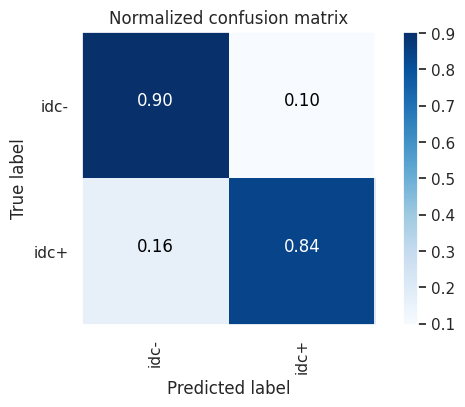

Epoch 8/60
9207/9207 [==============================] - 1108s 120ms/step - loss: 0.2841 - accuracy: 0.8817 - val_loss: 0.3053 - val_accuracy: 0.8714

Epoch 00008: val_accuracy did not improve from 0.88533
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.320875


---------------------
| Balanced Accuracy  |
---------------------

    0.8073193573520613


---------------------
|      Accuracy      |
---------------------

    0.8714133464502377


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.876154  0.955531  0.914123     17473
           1   0.854494  0.659107  0.744190      6923

    accuracy                       0.871413     24396
   macro avg   0.865324  0.807319  0.829156     24396
weighted avg   0.870008  0.871413  0.865900     24396

--------------------
| Confusion Matrix |
--------------------

 [[1669

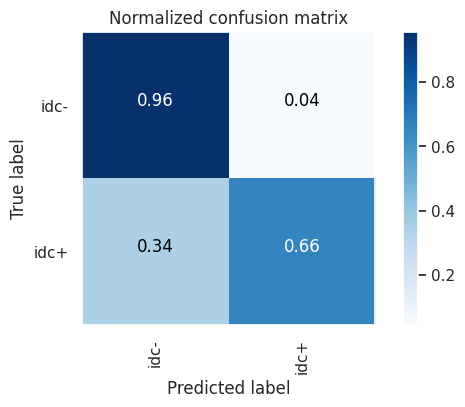

Epoch 9/60
9207/9207 [==============================] - 1108s 120ms/step - loss: 0.2788 - accuracy: 0.8831 - val_loss: 0.2967 - val_accuracy: 0.8718

Epoch 00009: val_accuracy did not improve from 0.88533
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.283763


---------------------
| Balanced Accuracy  |
---------------------

    0.8548187538539372


---------------------
|      Accuracy      |
---------------------

    0.8717412690605018


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.924479  0.893951  0.908959     17473
           1   0.752933  0.815687  0.783055      6923

    accuracy                       0.871741     24396
   macro avg   0.838706  0.854819  0.846007     24396
weighted avg   0.875799  0.871741  0.873230     24396

--------------------
| Confusion Matrix |
--------------------

 [[1562

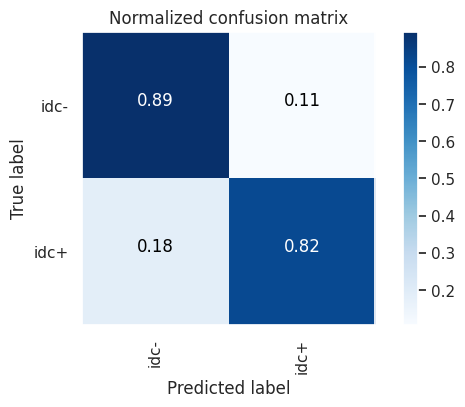

Epoch 10/60
9207/9207 [==============================] - 1108s 120ms/step - loss: 0.2735 - accuracy: 0.8855 - val_loss: 0.3405 - val_accuracy: 0.8619

Epoch 00010: val_accuracy did not improve from 0.88533
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.357567


---------------------
| Balanced Accuracy  |
---------------------

    0.780374465036868


---------------------
|      Accuracy      |
---------------------

    0.8618626004262994


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.856984  0.968809  0.909472     17473
           1   0.882619  0.591940  0.708629      6923

    accuracy                       0.861863     24396
   macro avg   0.869801  0.780374  0.809050     24396
weighted avg   0.864258  0.861863  0.852477     24396

--------------------
| Confusion Matrix |
--------------------

 [[1692

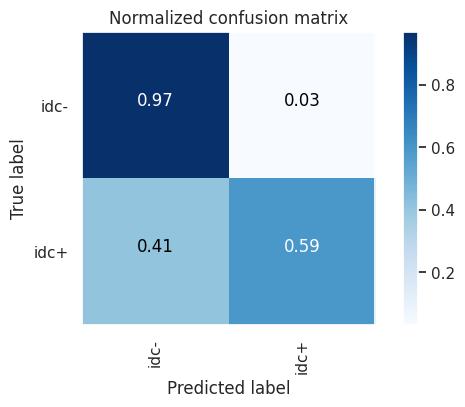

Epoch 11/60
9207/9207 [==============================] - 1107s 120ms/step - loss: 0.2691 - accuracy: 0.8874 - val_loss: 0.3970 - val_accuracy: 0.8246

Epoch 00011: val_accuracy did not improve from 0.88533
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.218482


---------------------
| Balanced Accuracy  |
---------------------

    0.829570757479696


---------------------
|      Accuracy      |
---------------------

    0.824643384161338


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.928493  0.818177  0.869851     17473
           1   0.646961  0.840965  0.731315      6923

    accuracy                       0.824643     24396
   macro avg   0.787727  0.829571  0.800583     24396
weighted avg   0.848601  0.824643  0.830538     24396

--------------------
| Confusion Matrix |
--------------------

 [[14296

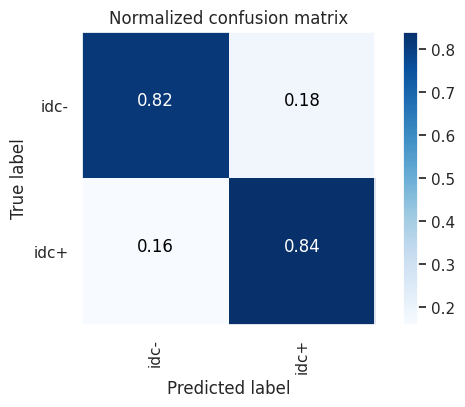

Epoch 12/60
9207/9207 [==============================] - 1108s 120ms/step - loss: 0.2657 - accuracy: 0.8891 - val_loss: 0.3239 - val_accuracy: 0.8597

Epoch 00012: val_accuracy did not improve from 0.88533
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.268109


---------------------
| Balanced Accuracy  |
---------------------

    0.8525408000568493


---------------------
|      Accuracy      |
---------------------

    0.8596081324807345


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.930498  0.868883  0.898636     17473
           1   0.716460  0.836198  0.771712      6923

    accuracy                       0.859608     24396
   macro avg   0.823479  0.852541  0.835174     24396
weighted avg   0.869759  0.859608  0.862618     24396

--------------------
| Confusion Matrix |
--------------------

 [[151

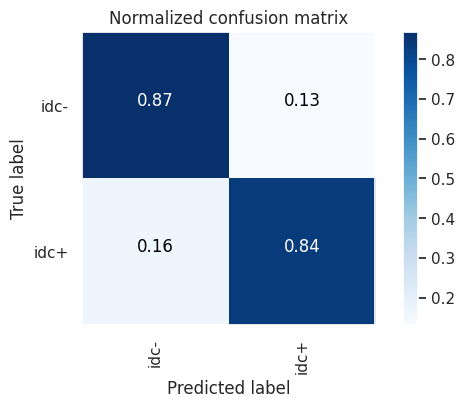

Epoch 13/60
9207/9207 [==============================] - 1108s 120ms/step - loss: 0.2625 - accuracy: 0.8908 - val_loss: 0.2400 - val_accuracy: 0.9019

Epoch 00013: val_accuracy improved from 0.88533 to 0.90190, saving model to best_model_multiclass_128.h5
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.232544


---------------------
| Balanced Accuracy  |
---------------------

    0.8755309599270384


---------------------
|      Accuracy      |
---------------------

    0.9019101492047876


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.927244  0.936531  0.931864     17473
           1   0.835655  0.814531  0.824958      6923

    accuracy                       0.901910     24396
   macro avg   0.881449  0.875531  0.878411     24396
weighted avg   0.901253  0.901910  0.901527     24396

--------------------

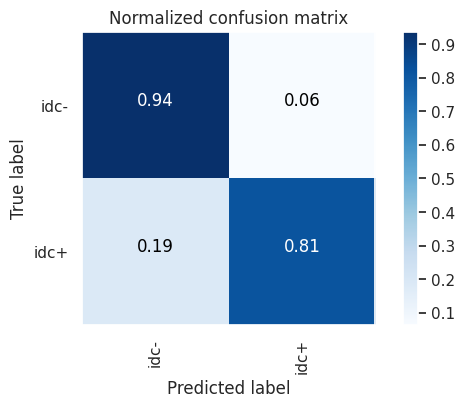

Epoch 14/60
9207/9207 [==============================] - 1108s 120ms/step - loss: 0.2595 - accuracy: 0.8918 - val_loss: 0.2645 - val_accuracy: 0.8926

Epoch 00014: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.197377


---------------------
| Balanced Accuracy  |
---------------------

    0.8893712855290843


---------------------
|      Accuracy      |
---------------------

    0.8925643548122643


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.950443  0.896755  0.922819     17473
           1   0.771934  0.881988  0.823299      6923

    accuracy                       0.892564     24396
   macro avg   0.861189  0.889371  0.873059     24396
weighted avg   0.899786  0.892564  0.894578     24396

--------------------
| Confusion Matrix |
--------------------

 [[156

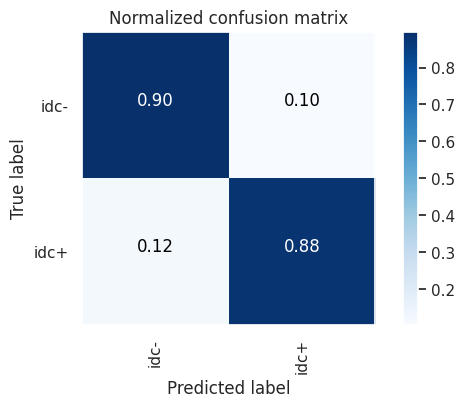

Epoch 15/60
9207/9207 [==============================] - 1108s 120ms/step - loss: 0.2564 - accuracy: 0.8938 - val_loss: 0.8743 - val_accuracy: 0.8150

Epoch 00015: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.310865


---------------------
| Balanced Accuracy  |
---------------------

    0.7343665878704222


---------------------
|      Accuracy      |
---------------------

    0.8150106574848336


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.837149  0.920849  0.877007     17473
           1   0.732805  0.547884  0.626994      6923

    accuracy                       0.815011     24396
   macro avg   0.784977  0.734367  0.752000     24396
weighted avg   0.807539  0.815011  0.806059     24396

--------------------
| Confusion Matrix |
--------------------

 [[160

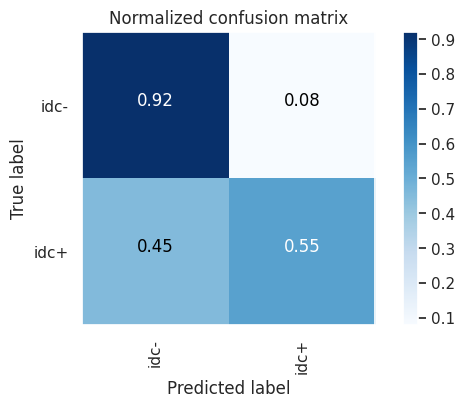

Epoch 16/60
9207/9207 [==============================] - 1109s 120ms/step - loss: 0.2528 - accuracy: 0.8949 - val_loss: 0.3728 - val_accuracy: 0.8647

Epoch 00016: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.247245


---------------------
| Balanced Accuracy  |
---------------------

    0.8084125691656467


---------------------
|      Accuracy      |
---------------------

    0.8646089522872602


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.880464  0.938362  0.908491     17473
           1   0.813474  0.678463  0.739860      6923

    accuracy                       0.864609     24396
   macro avg   0.846969  0.808413  0.824176     24396
weighted avg   0.861454  0.864609  0.860638     24396

--------------------
| Confusion Matrix |
--------------------

 [[163

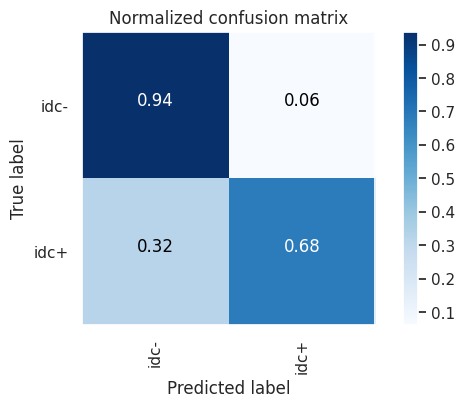

Epoch 17/60
9207/9207 [==============================] - 1113s 121ms/step - loss: 0.2506 - accuracy: 0.8957 - val_loss: 0.3167 - val_accuracy: 0.8634

Epoch 00017: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.285039


---------------------
| Balanced Accuracy  |
---------------------

    0.8796958099956683


---------------------
|      Accuracy      |
---------------------

    0.8633382521724873


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.962633  0.841870  0.898211     17473
           1   0.696873  0.917521  0.792119      6923

    accuracy                       0.863338     24396
   macro avg   0.829753  0.879696  0.845165     24396
weighted avg   0.887217  0.863338  0.868104     24396

--------------------
| Confusion Matrix |
--------------------

 [[147

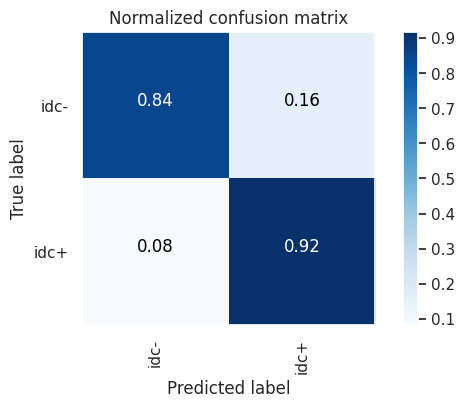

Epoch 18/60
9207/9207 [==============================] - 1109s 121ms/step - loss: 0.2484 - accuracy: 0.8965 - val_loss: 0.2630 - val_accuracy: 0.8878

Epoch 00018: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.057431


---------------------
| Balanced Accuracy  |
---------------------

    0.8686375154704133


---------------------
|      Accuracy      |
---------------------

    0.8878504672897196


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.929125  0.913066  0.921025     17473
           1   0.789758  0.824209  0.806616      6923

    accuracy                       0.887850     24396
   macro avg   0.859441  0.868638  0.863821     24396
weighted avg   0.889576  0.887850  0.888559     24396

--------------------
| Confusion Matrix |
--------------------

 [[159

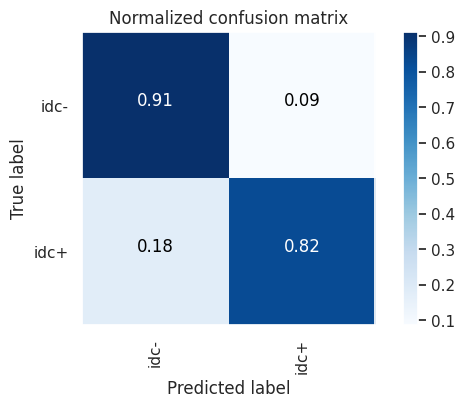

Epoch 19/60
9207/9207 [==============================] - 1108s 120ms/step - loss: 0.2458 - accuracy: 0.8982 - val_loss: 0.2421 - val_accuracy: 0.9016

Epoch 00019: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.176628


---------------------
| Balanced Accuracy  |
---------------------

    0.8904338191941361


---------------------
|      Accuracy      |
---------------------

    0.9015822265945237


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.944707  0.916214  0.930242     17473
           1   0.803490  0.864654  0.832951      6923

    accuracy                       0.901582     24396
   macro avg   0.874098  0.890434  0.881596     24396
weighted avg   0.904633  0.901582  0.902633     24396

--------------------
| Confusion Matrix |
--------------------

 [[160

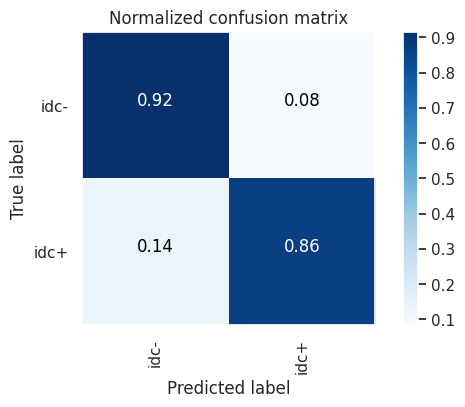

Epoch 20/60
9207/9207 [==============================] - 1108s 120ms/step - loss: 0.2427 - accuracy: 0.8996 - val_loss: 0.2912 - val_accuracy: 0.8785

Epoch 00020: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.309237


---------------------
| Balanced Accuracy  |
---------------------

    0.8675341106745746


---------------------
|      Accuracy      |
---------------------

    0.8785866535497623


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.934487  0.893092  0.913321     17473
           1   0.757308  0.841976  0.797401      6923

    accuracy                       0.878587     24396
   macro avg   0.845898  0.867534  0.855361     24396
weighted avg   0.884208  0.878587  0.880426     24396

--------------------
| Confusion Matrix |
--------------------

 [[156

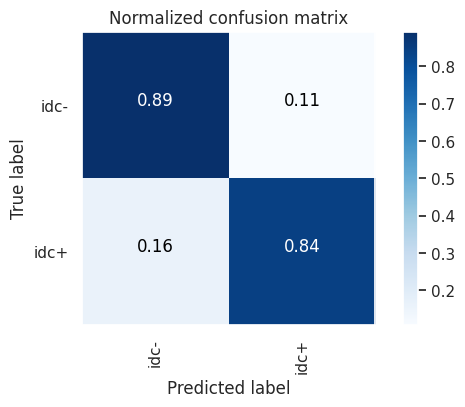

Epoch 21/60
9207/9207 [==============================] - 1107s 120ms/step - loss: 0.2405 - accuracy: 0.9005 - val_loss: 0.3315 - val_accuracy: 0.8681

Epoch 00021: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.190916


---------------------
| Balanced Accuracy  |
---------------------

    0.824596230800499


---------------------
|      Accuracy      |
---------------------

    0.8680521396950319


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.894323  0.925084  0.909444     17473
           1   0.792945  0.724108  0.756965      6923

    accuracy                       0.868052     24396
   macro avg   0.843634  0.824596  0.833204     24396
weighted avg   0.865555  0.868052  0.866174     24396

--------------------
| Confusion Matrix |
--------------------

 [[1616

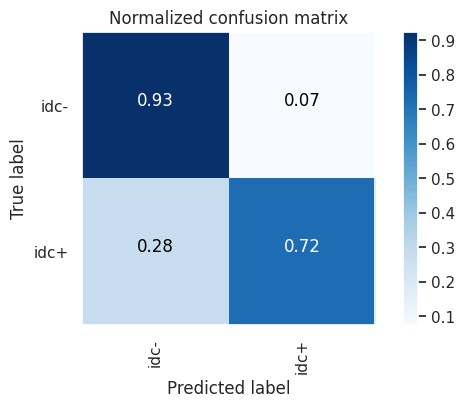

Epoch 22/60
9207/9207 [==============================] - 1107s 120ms/step - loss: 0.2387 - accuracy: 0.9015 - val_loss: 0.3055 - val_accuracy: 0.8704

Epoch 00022: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.182781


---------------------
| Balanced Accuracy  |
---------------------

    0.8894145085685904


---------------------
|      Accuracy      |
---------------------

    0.8703885882931628


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.969737  0.845419  0.903320     17473
           1   0.705228  0.933410  0.803432      6923

    accuracy                       0.870389     24396
   macro avg   0.837482  0.889415  0.853376     24396
weighted avg   0.894675  0.870389  0.874974     24396

--------------------
| Confusion Matrix |
--------------------

 [[147

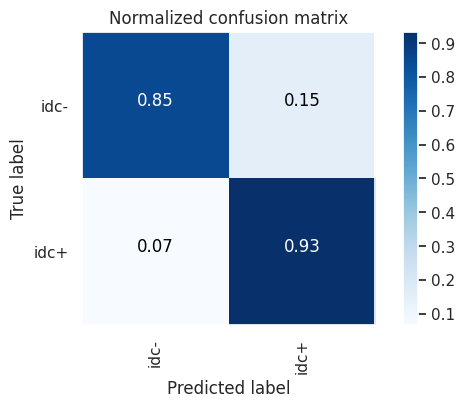

Epoch 23/60
9207/9207 [==============================] - 1110s 121ms/step - loss: 0.2365 - accuracy: 0.9020 - val_loss: 0.3115 - val_accuracy: 0.8654

Epoch 00023: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 39s 26ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:39.228642


---------------------
| Balanced Accuracy  |
---------------------

    0.8618943369005823


---------------------
|      Accuracy      |
---------------------

    0.8655107394654862


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.937485  0.870257  0.902621     17473
           1   0.722725  0.853532  0.782701      6923

    accuracy                       0.865511     24396
   macro avg   0.830105  0.861894  0.842661     24396
weighted avg   0.876541  0.865511  0.868590     24396

--------------------
| Confusion Matrix |
--------------------

 [[152

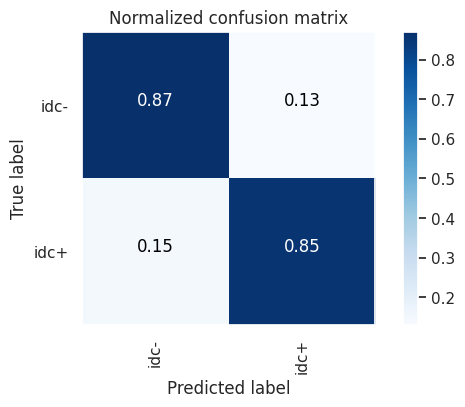

Epoch 24/60
9207/9207 [==============================] - 1109s 120ms/step - loss: 0.2349 - accuracy: 0.9027 - val_loss: 0.3472 - val_accuracy: 0.8879

Epoch 00024: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.203820


---------------------
| Balanced Accuracy  |
---------------------

    0.8309892973769009


---------------------
|      Accuracy      |
---------------------

    0.8878914576160026


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.889894  0.962571  0.924807     17473
           1   0.881004  0.699408  0.779773      6923

    accuracy                       0.887891     24396
   macro avg   0.885449  0.830989  0.852290     24396
weighted avg   0.887371  0.887891  0.883650     24396

--------------------
| Confusion Matrix |
--------------------

 [[168

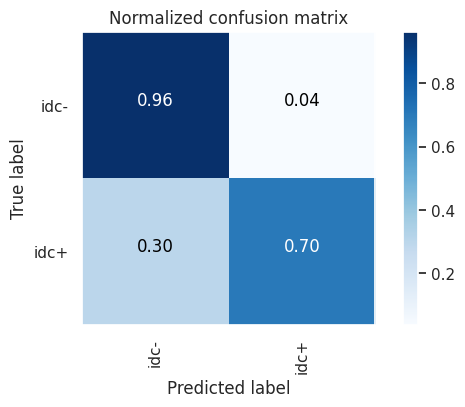

Epoch 25/60
9207/9207 [==============================] - 1108s 120ms/step - loss: 0.2316 - accuracy: 0.9040 - val_loss: 0.4655 - val_accuracy: 0.8417

Epoch 00025: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.269835


---------------------
| Balanced Accuracy  |
---------------------

    0.7378049461491851


---------------------
|      Accuracy      |
---------------------

    0.8417363502213477


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.830870  0.978138  0.898510     17473
           1   0.900157  0.497472  0.640804      6923

    accuracy                       0.841736     24396
   macro avg   0.865514  0.737805  0.769657     24396
weighted avg   0.850532  0.841736  0.825379     24396

--------------------
| Confusion Matrix |
--------------------

 [[170

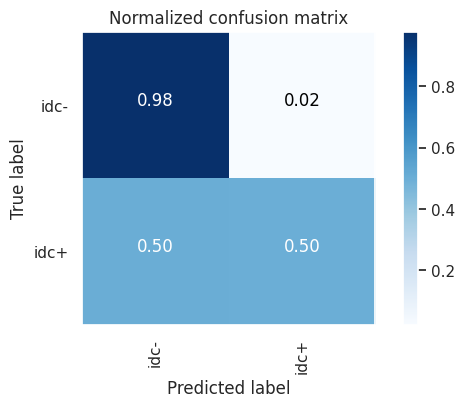

Epoch 26/60
9207/9207 [==============================] - 1108s 120ms/step - loss: 0.2301 - accuracy: 0.9046 - val_loss: 0.2489 - val_accuracy: 0.8999

Epoch 00026: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.248440


---------------------
| Balanced Accuracy  |
---------------------

    0.8784023263345022


---------------------
|      Accuracy      |
---------------------

    0.8999016232169208


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.931851  0.928118  0.929981     17473
           1   0.820392  0.828687  0.824519      6923

    accuracy                       0.899902     24396
   macro avg   0.876121  0.878402  0.877250     24396
weighted avg   0.900221  0.899902  0.900053     24396

--------------------
| Confusion Matrix |
--------------------

 [[162

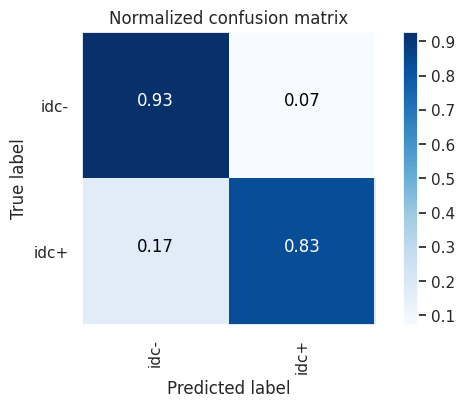

Epoch 27/60
9207/9207 [==============================] - 1109s 120ms/step - loss: 0.2289 - accuracy: 0.9054 - val_loss: 0.2617 - val_accuracy: 0.8926

Epoch 00027: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.178580


---------------------
| Balanced Accuracy  |
---------------------

    0.8877005788564034


---------------------
|      Accuracy      |
---------------------

    0.8924823741596983


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.948424  0.898758  0.922923     17473
           1   0.774305  0.876643  0.822302      6923

    accuracy                       0.892482     24396
   macro avg   0.861364  0.887701  0.872613     24396
weighted avg   0.899013  0.892482  0.894369     24396

--------------------
| Confusion Matrix |
--------------------

 [[157

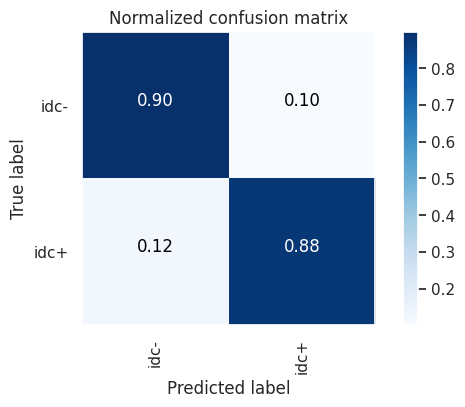

Epoch 28/60
9207/9207 [==============================] - 1108s 120ms/step - loss: 0.2277 - accuracy: 0.9056 - val_loss: 0.2768 - val_accuracy: 0.8972

Epoch 00028: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.286745


---------------------
| Balanced Accuracy  |
---------------------

    0.8690418329663846


---------------------
|      Accuracy      |
---------------------

    0.897237252008526


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.923199  0.934241  0.928687     17473
           1   0.828865  0.803842  0.816162      6923

    accuracy                       0.897237     24396
   macro avg   0.876032  0.869042  0.872425     24396
weighted avg   0.896429  0.897237  0.896755     24396

--------------------
| Confusion Matrix |
--------------------

 [[1632

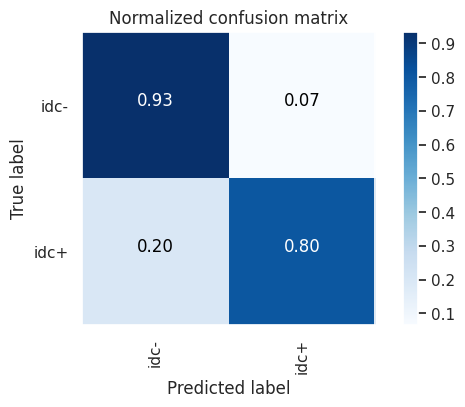

Epoch 29/60
9207/9207 [==============================] - 1110s 121ms/step - loss: 0.2253 - accuracy: 0.9075 - val_loss: 0.2696 - val_accuracy: 0.8966

Epoch 00029: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.270423


---------------------
| Balanced Accuracy  |
---------------------

    0.8899230168608543


---------------------
|      Accuracy      |
---------------------

    0.896540416461715


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.947977  0.905225  0.926108     17473
           1   0.785242  0.874621  0.827525      6923

    accuracy                       0.896540     24396
   macro avg   0.866610  0.889923  0.876817     24396
weighted avg   0.901797  0.896540  0.898133     24396

--------------------
| Confusion Matrix |
--------------------

 [[1581

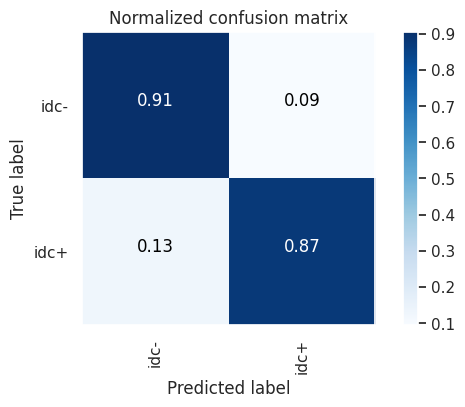

Epoch 30/60
9207/9207 [==============================] - 1109s 120ms/step - loss: 0.2233 - accuracy: 0.9079 - val_loss: 0.2773 - val_accuracy: 0.8875

Epoch 00030: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.191999


---------------------
| Balanced Accuracy  |
---------------------

    0.8902859052160614


---------------------
|      Accuracy      |
---------------------

    0.8874405640268896


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.955803  0.883706  0.918342     17473
           1   0.753428  0.896866  0.818913      6923

    accuracy                       0.887441     24396
   macro avg   0.854616  0.890286  0.868628     24396
weighted avg   0.898374  0.887441  0.890126     24396

--------------------
| Confusion Matrix |
--------------------

 [[154

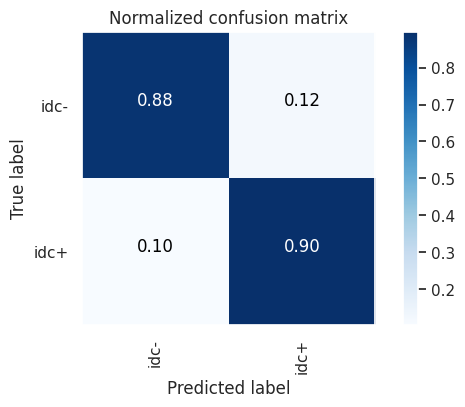

Epoch 31/60
9207/9207 [==============================] - 1109s 120ms/step - loss: 0.2220 - accuracy: 0.9080 - val_loss: 0.2658 - val_accuracy: 0.8970

Epoch 00031: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.376102


---------------------
| Balanced Accuracy  |
---------------------

    0.8718354458502613


---------------------
|      Accuracy      |
---------------------

    0.896991310050828


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.926454  0.930006  0.928227     17473
           1   0.821616  0.813665  0.817621      6923

    accuracy                       0.896991     24396
   macro avg   0.874035  0.871835  0.872924     24396
weighted avg   0.896703  0.896991  0.896839     24396

--------------------
| Confusion Matrix |
--------------------

 [[1625

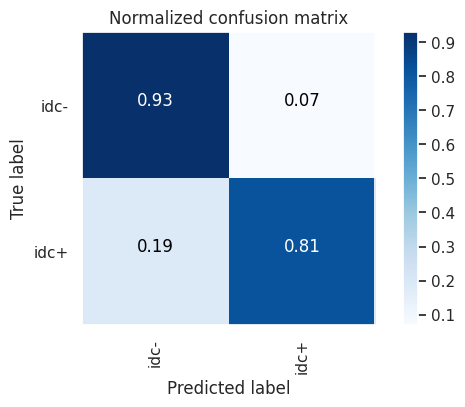

Epoch 32/60
9207/9207 [==============================] - 1109s 120ms/step - loss: 0.2213 - accuracy: 0.9087 - val_loss: 0.2761 - val_accuracy: 0.8919

Epoch 00032: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.308314


---------------------
| Balanced Accuracy  |
---------------------

    0.8520801359533856


---------------------
|      Accuracy      |
---------------------

    0.8918675192654534


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.908520  0.944085  0.925961     17473
           1   0.843404  0.760075  0.799575      6923

    accuracy                       0.891868     24396
   macro avg   0.875962  0.852080  0.862768     24396
weighted avg   0.890042  0.891868  0.890096     24396

--------------------
| Confusion Matrix |
--------------------

 [[164

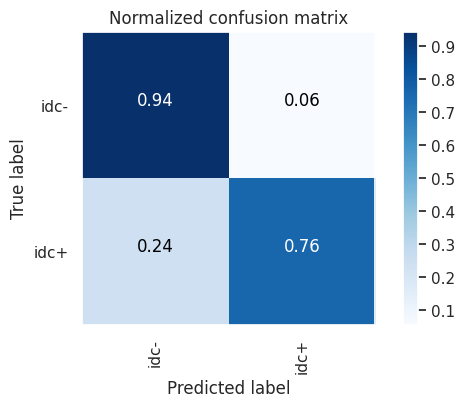

Epoch 33/60
9207/9207 [==============================] - 1109s 120ms/step - loss: 0.2196 - accuracy: 0.9094 - val_loss: 0.3844 - val_accuracy: 0.8631

Epoch 00033: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.215887


---------------------
| Balanced Accuracy  |
---------------------

    0.8505551484195351


---------------------
|      Accuracy      |
---------------------

    0.8630103295622233


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.925658  0.879357  0.901914     17473
           1   0.729640  0.821754  0.772962      6923

    accuracy                       0.863010     24396
   macro avg   0.827649  0.850555  0.837438     24396
weighted avg   0.870033  0.863010  0.865320     24396

--------------------
| Confusion Matrix |
--------------------

 [[153

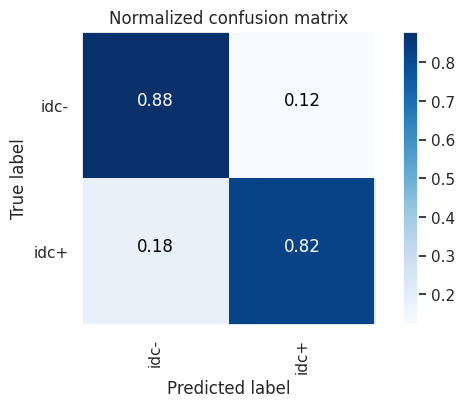

Epoch 34/60
9207/9207 [==============================] - 1111s 121ms/step - loss: 0.2178 - accuracy: 0.9105 - val_loss: 0.2731 - val_accuracy: 0.8949

Epoch 00034: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.354978


---------------------
| Balanced Accuracy  |
---------------------

    0.8462175260616907


---------------------
|      Accuracy      |
---------------------

    0.8949008034103951


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.900844  0.958794  0.928916     17473
           1   0.875841  0.733641  0.798459      6923

    accuracy                       0.894901     24396
   macro avg   0.888342  0.846218  0.863688     24396
weighted avg   0.893749  0.894901  0.891896     24396

--------------------
| Confusion Matrix |
--------------------

 [[167

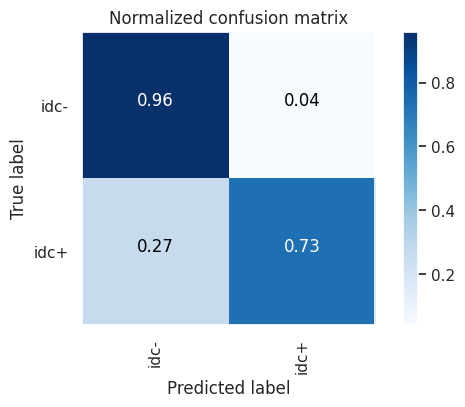

Epoch 35/60
9207/9207 [==============================] - 1108s 120ms/step - loss: 0.2173 - accuracy: 0.9111 - val_loss: 0.2358 - val_accuracy: 0.9003

Epoch 00035: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.333374


---------------------
| Balanced Accuracy  |
---------------------

    0.8840958054687607


---------------------
|      Accuracy      |
---------------------

    0.9003115264797508


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.938130  0.921593  0.929788     17473
           1   0.810538  0.846598  0.828176      6923

    accuracy                       0.900312     24396
   macro avg   0.874334  0.884096  0.878982     24396
weighted avg   0.901922  0.900312  0.900953     24396

--------------------
| Confusion Matrix |
--------------------

 [[161

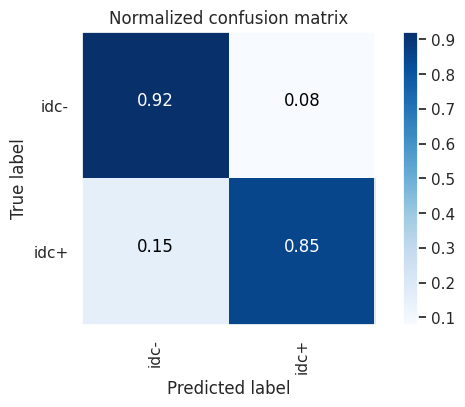

Epoch 36/60
9207/9207 [==============================] - 1108s 120ms/step - loss: 0.2136 - accuracy: 0.9120 - val_loss: 0.3841 - val_accuracy: 0.8923

Epoch 00036: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 37s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.263969


---------------------
| Balanced Accuracy  |
---------------------

    0.8912791257751099


---------------------
|      Accuracy      |
---------------------

    0.8922364322020003


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.953114  0.893493  0.922341     17473
           1   0.767839  0.889065  0.824018      6923

    accuracy                       0.892236     24396
   macro avg   0.860476  0.891279  0.873179     24396
weighted avg   0.900537  0.892236  0.894439     24396

--------------------
| Confusion Matrix |
--------------------

 [[156

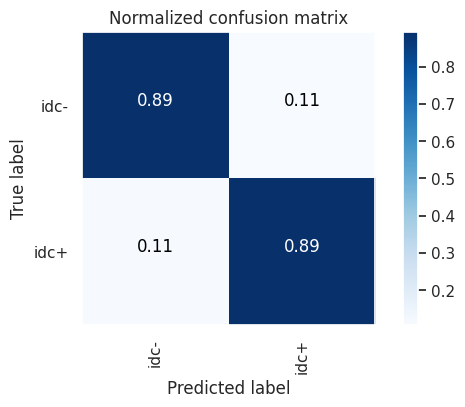

Epoch 37/60
9207/9207 [==============================] - 1125s 122ms/step - loss: 0.2120 - accuracy: 0.9125 - val_loss: 0.9035 - val_accuracy: 0.8402

Epoch 00037: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 37s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.523039


---------------------
| Balanced Accuracy  |
---------------------

    0.8276527035843808


---------------------
|      Accuracy      |
---------------------

    0.8402606984751598


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.914762  0.856808  0.884837     17473
           1   0.688418  0.798498  0.739383      6923

    accuracy                       0.840261     24396
   macro avg   0.801590  0.827653  0.812110     24396
weighted avg   0.850531  0.840261  0.843561     24396

--------------------
| Confusion Matrix |
--------------------

 [[149

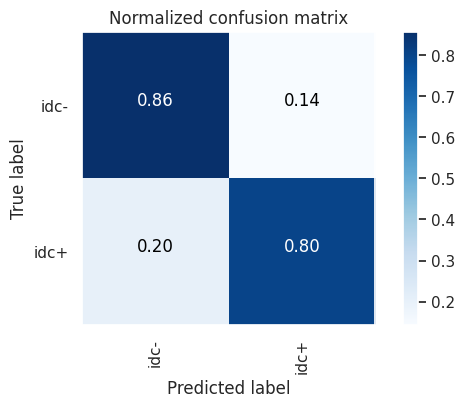

Epoch 38/60
9207/9207 [==============================] - 1126s 122ms/step - loss: 0.2105 - accuracy: 0.9134 - val_loss: 0.5372 - val_accuracy: 0.8340

Epoch 00038: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 41s 27ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:41.044596


---------------------
| Balanced Accuracy  |
---------------------

    0.8196987094981788


---------------------
|      Accuracy      |
---------------------

    0.8339891785538613


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.909813  0.852744  0.880355     17473
           1   0.679137  0.786653  0.728952      6923

    accuracy                       0.833989     24396
   macro avg   0.794475  0.819699  0.804653     24396
weighted avg   0.844352  0.833989  0.837390     24396

--------------------
| Confusion Matrix |
--------------------

 [[149

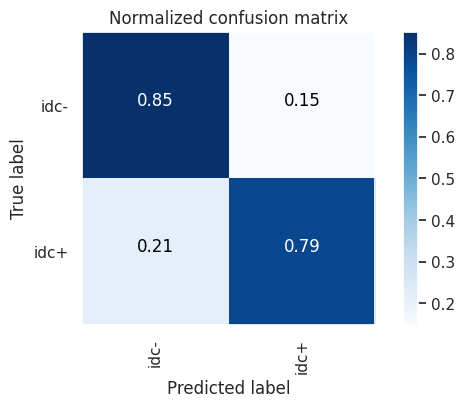

Epoch 39/60
9207/9207 [==============================] - 1151s 125ms/step - loss: 0.2099 - accuracy: 0.9136 - val_loss: 1.5692 - val_accuracy: 0.8717

Epoch 00039: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 52s 34ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:52.158082


---------------------
| Balanced Accuracy  |
---------------------

    0.87522840691731


---------------------
|      Accuracy      |
---------------------

    0.8716182980816527


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.949477  0.866880  0.906300     17473
           1   0.724506  0.883576  0.796173      6923

    accuracy                       0.871618     24396
   macro avg   0.836991  0.875228  0.851237     24396
weighted avg   0.885635  0.871618  0.875049     24396

--------------------
| Confusion Matrix |
--------------------

 [[15147

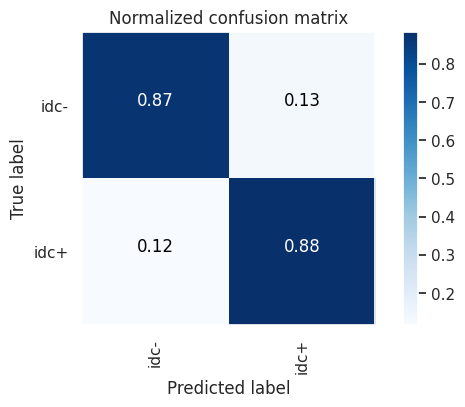

Epoch 40/60
9207/9207 [==============================] - 1134s 123ms/step - loss: 0.2077 - accuracy: 0.9145 - val_loss: 1.4785 - val_accuracy: 0.8901

Epoch 00040: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 51s 34ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:51.498203


---------------------
| Balanced Accuracy  |
---------------------

    0.8833808210846492


---------------------
|      Accuracy      |
---------------------

    0.8901049352352844


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.944952  0.898930  0.921367     17473
           1   0.772833  0.867832  0.817582      6923

    accuracy                       0.890105     24396
   macro avg   0.858892  0.883381  0.869474     24396
weighted avg   0.896109  0.890105  0.891915     24396

--------------------
| Confusion Matrix |
--------------------

 [[157

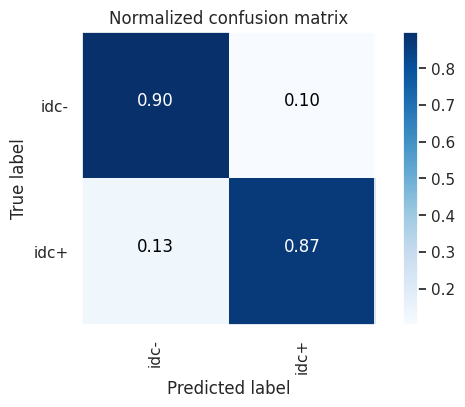

Epoch 41/60
9207/9207 [==============================] - 1144s 124ms/step - loss: 0.2069 - accuracy: 0.9152 - val_loss: 0.4481 - val_accuracy: 0.8948

Epoch 00041: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 53s 35ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:52.933968


---------------------
| Balanced Accuracy  |
---------------------

    0.8660016830076926


---------------------
|      Accuracy      |
---------------------

    0.8948188227578292


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.921459  0.932639  0.927015     17473
           1   0.824616  0.799364  0.811794      6923

    accuracy                       0.894819     24396
   macro avg   0.873038  0.866002  0.869405     24396
weighted avg   0.893977  0.894819  0.894318     24396

--------------------
| Confusion Matrix |
--------------------

 [[162

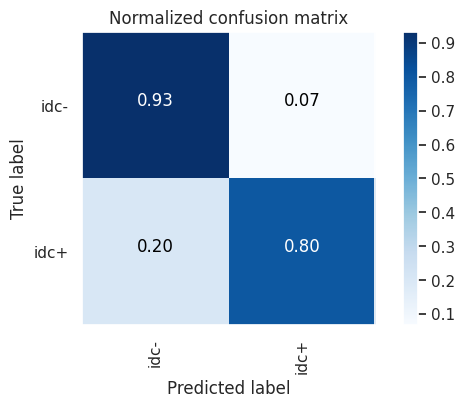

Epoch 42/60
9207/9207 [==============================] - 1135s 123ms/step - loss: 0.2054 - accuracy: 0.9156 - val_loss: 1.1320 - val_accuracy: 0.8656

Epoch 00042: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 39s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:38.561037


---------------------
| Balanced Accuracy  |
---------------------

    0.8764142483871382


---------------------
|      Accuracy      |
---------------------

    0.8656337104443351


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.956108  0.851485  0.900769     17473
           1   0.706282  0.901343  0.791979      6923

    accuracy                       0.865634     24396
   macro avg   0.831195  0.876414  0.846374     24396
weighted avg   0.885213  0.865634  0.869897     24396

--------------------
| Confusion Matrix |
--------------------

 [[148

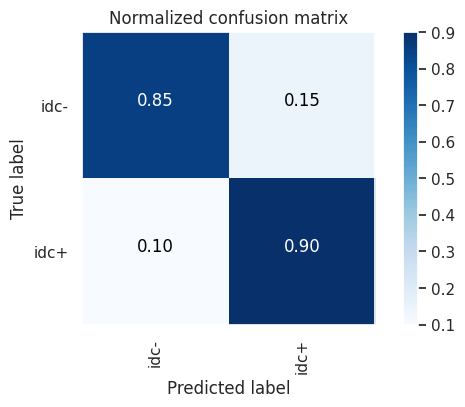

Epoch 43/60
9207/9207 [==============================] - 1133s 123ms/step - loss: 0.2024 - accuracy: 0.9164 - val_loss: 0.6898 - val_accuracy: 0.8948

Epoch 00043: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:38.307883


---------------------
| Balanced Accuracy  |
---------------------

    0.8727172297501259


---------------------
|      Accuracy      |
---------------------

    0.8948188227578292


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.928929  0.923825  0.926370     17473
           1   0.810372  0.821609  0.815952      6923

    accuracy                       0.894819     24396
   macro avg   0.869650  0.872717  0.871161     24396
weighted avg   0.895285  0.894819  0.895036     24396

--------------------
| Confusion Matrix |
--------------------

 [[161

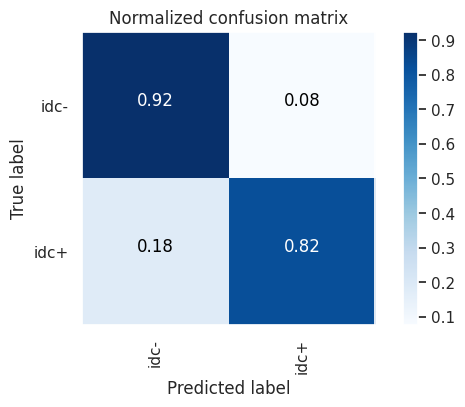

Epoch 44/60
9207/9207 [==============================] - 1128s 123ms/step - loss: 0.2011 - accuracy: 0.9167 - val_loss: 0.2904 - val_accuracy: 0.8922

Epoch 00044: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:38.118516


---------------------
| Balanced Accuracy  |
---------------------

    0.8624409800080401


---------------------
|      Accuracy      |
---------------------

    0.8921544515494343


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.919313  0.931151  0.925194     17473
           1   0.820394  0.793731  0.806842      6923

    accuracy                       0.892154     24396
   macro avg   0.869854  0.862441  0.866018     24396
weighted avg   0.891242  0.892154  0.891609     24396

--------------------
| Confusion Matrix |
--------------------

 [[162

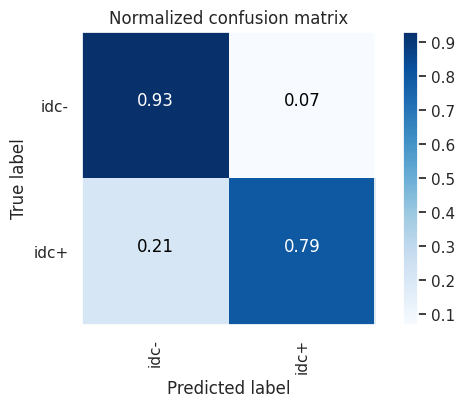

Epoch 45/60
9207/9207 [==============================] - 1167s 127ms/step - loss: 0.1990 - accuracy: 0.9179 - val_loss: 0.3365 - val_accuracy: 0.8742

Epoch 00045: val_accuracy did not improve from 0.90190
Predicting test data
1525/1525 [==============================] - 51s 33ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:51.056248


---------------------
| Balanced Accuracy  |
---------------------

    0.8770747957979022


---------------------
|      Accuracy      |
---------------------

    0.8742006886374816


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.949731  0.870429  0.908352     17473
           1   0.729897  0.883721  0.799477      6923

    accuracy                       0.874201     24396
   macro avg   0.839814  0.877075  0.853915     24396
weighted avg   0.887348  0.874201  0.877456     24396

--------------------
| Confusion Matrix |
--------------------

 [[152

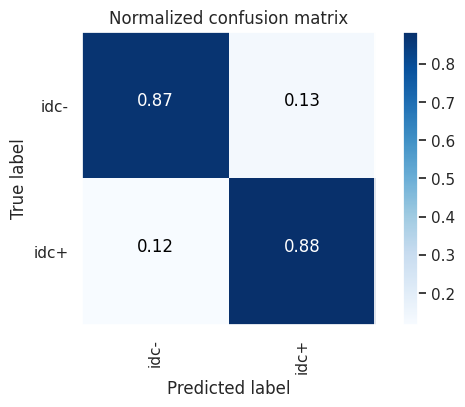

Epoch 46/60
9207/9207 [==============================] - 1220s 133ms/step - loss: 0.1996 - accuracy: 0.9178 - val_loss: 0.2403 - val_accuracy: 0.9083

Epoch 00046: val_accuracy improved from 0.90190 to 0.90826, saving model to best_model_multiclass_128.h5
Predicting test data
1525/1525 [==============================] - 40s 26ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:40.088928


---------------------
| Balanced Accuracy  |
---------------------

    0.8760853118389984


---------------------
|      Accuracy      |
---------------------

    0.9082636497786523


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.923642  0.950495  0.936876     17473
           1   0.865160  0.801676  0.832209      6923

    accuracy                       0.908264     24396
   macro avg   0.894401  0.876085  0.884542     24396
weighted avg   0.907046  0.908264  0.907174     24396

--------------------

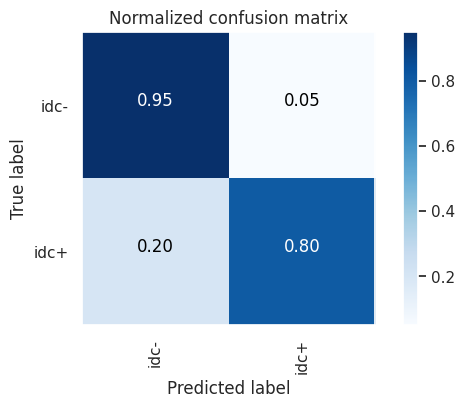

Epoch 47/60
9207/9207 [==============================] - 1139s 124ms/step - loss: 0.1974 - accuracy: 0.9185 - val_loss: 1.8768 - val_accuracy: 0.8860

Epoch 00047: val_accuracy did not improve from 0.90826
Predicting test data
1525/1525 [==============================] - 40s 26ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:39.839760


---------------------
| Balanced Accuracy  |
---------------------

    0.8452122235532804


---------------------
|      Accuracy      |
---------------------

    0.8859649122807017


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.904956  0.939449  0.921880     17473
           1   0.830909  0.750975  0.788923      6923

    accuracy                       0.885965     24396
   macro avg   0.867933  0.845212  0.855401     24396
weighted avg   0.883943  0.885965  0.884150     24396

--------------------
| Confusion Matrix |
--------------------

 [[164

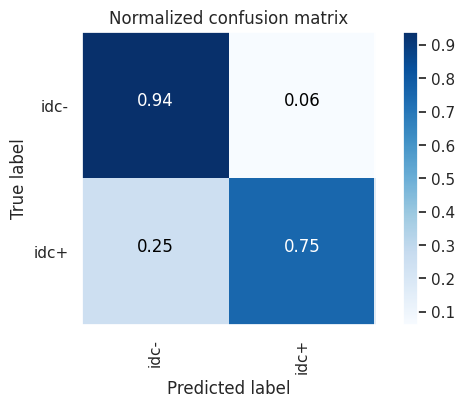

Epoch 48/60
9207/9207 [==============================] - 1141s 124ms/step - loss: 0.1948 - accuracy: 0.9201 - val_loss: 65.9226 - val_accuracy: 0.9024

Epoch 00048: val_accuracy did not improve from 0.90826
Predicting test data
1525/1525 [==============================] - 40s 26ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:39.918497


---------------------
| Balanced Accuracy  |
---------------------

    0.879131281635084


---------------------
|      Accuracy      |
---------------------

    0.9023200524676176


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.930995  0.932753  0.931873     17473
           1   0.829463  0.825509  0.827481      6923

    accuracy                       0.902320     24396
   macro avg   0.880229  0.879131  0.879677     24396
weighted avg   0.902183  0.902320  0.902249     24396

--------------------
| Confusion Matrix |
--------------------

 [[162

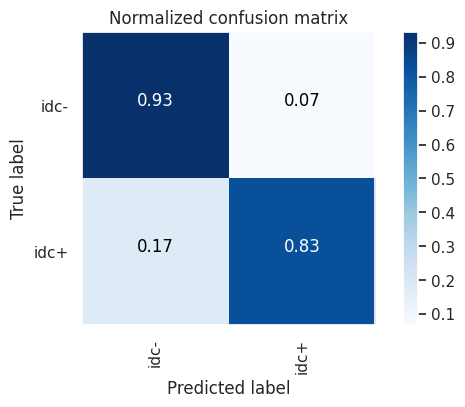

Epoch 49/60
9207/9207 [==============================] - 1186s 129ms/step - loss: 0.1941 - accuracy: 0.9210 - val_loss: 0.3181 - val_accuracy: 0.8979

Epoch 00049: val_accuracy did not improve from 0.90826
Predicting test data
1525/1525 [==============================] - 53s 35ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:52.681812


---------------------
| Balanced Accuracy  |
---------------------

    0.8874659501278459


---------------------
|      Accuracy      |
---------------------

    0.897893097229054


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.943937  0.911578  0.927475     17473
           1   0.794602  0.863354  0.827553      6923

    accuracy                       0.897893     24396
   macro avg   0.869270  0.887466  0.877514     24396
weighted avg   0.901560  0.897893  0.899120     24396

--------------------
| Confusion Matrix |
--------------------

 [[1592

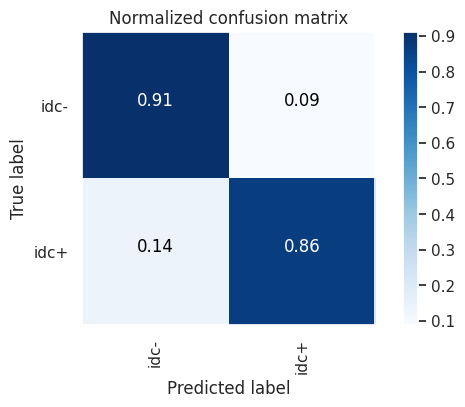

Epoch 50/60
9207/9207 [==============================] - 1224s 133ms/step - loss: 0.1908 - accuracy: 0.9217 - val_loss: 0.8082 - val_accuracy: 0.8598

Epoch 00050: val_accuracy did not improve from 0.90826
Predicting test data
1525/1525 [==============================] - 53s 34ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:52.570184


---------------------
| Balanced Accuracy  |
---------------------

    0.860345164800972


---------------------
|      Accuracy      |
---------------------

    0.8597311034595836


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.940056  0.858925  0.897661     17473
           1   0.707627  0.861765  0.777126      6923

    accuracy                       0.859731     24396
   macro avg   0.823841  0.860345  0.837394     24396
weighted avg   0.874098  0.859731  0.863456     24396

--------------------
| Confusion Matrix |
--------------------

 [[1500

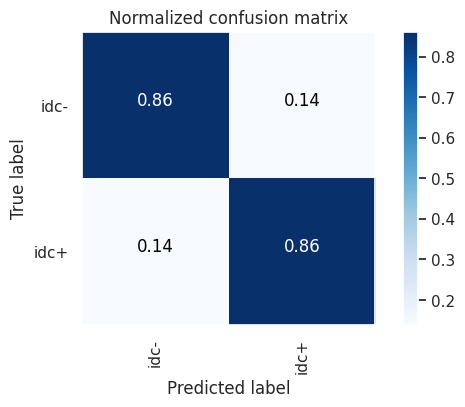

Epoch 51/60
9207/9207 [==============================] - 1144s 124ms/step - loss: 0.1901 - accuracy: 0.9216 - val_loss: 1.2173 - val_accuracy: 0.8875

Epoch 00051: val_accuracy did not improve from 0.90826
Predicting test data
1525/1525 [==============================] - 40s 26ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:40.040090


---------------------
| Balanced Accuracy  |
---------------------

    0.8729723808456288


---------------------
|      Accuracy      |
---------------------

    0.8875635350057386


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.934360  0.906713  0.920329     17473
           1   0.780914  0.839232  0.809023      6923

    accuracy                       0.887564     24396
   macro avg   0.857637  0.872972  0.864676     24396
weighted avg   0.890815  0.887564  0.888743     24396

--------------------
| Confusion Matrix |
--------------------

 [[158

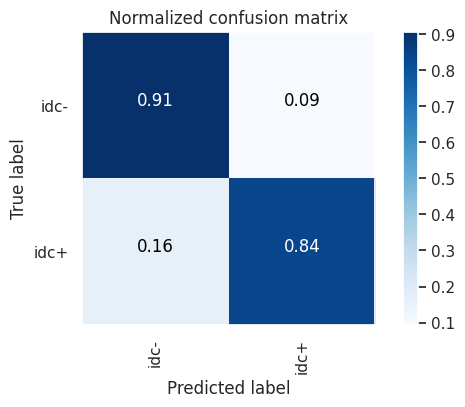

Epoch 52/60
9207/9207 [==============================] - 1172s 127ms/step - loss: 0.1882 - accuracy: 0.9227 - val_loss: 47.2590 - val_accuracy: 0.8986

Epoch 00052: val_accuracy did not improve from 0.90826
Predicting test data
1525/1525 [==============================] - 51s 33ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:50.656584


---------------------
| Balanced Accuracy  |
---------------------

    0.8888245638868888


---------------------
|      Accuracy      |
---------------------

    0.8985899327758649


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.945048  0.911406  0.927922     17473
           1   0.794831  0.866243  0.829002      6923

    accuracy                       0.898590     24396
   macro avg   0.869939  0.888825  0.878462     24396
weighted avg   0.902420  0.898590  0.899851     24396

--------------------
| Confusion Matrix |
--------------------

 [[15

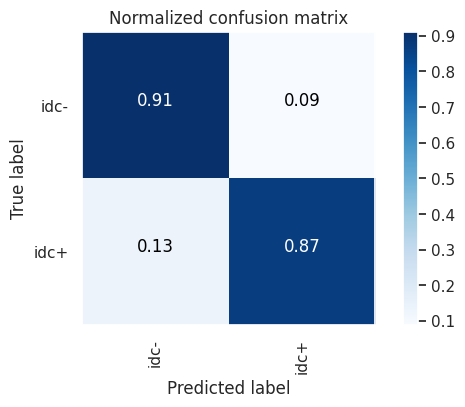

Epoch 53/60
9207/9207 [==============================] - 1249s 136ms/step - loss: 0.1862 - accuracy: 0.9240 - val_loss: 22.3767 - val_accuracy: 0.8446

Epoch 00053: val_accuracy did not improve from 0.90826
Predicting test data
1525/1525 [==============================] - 47s 31ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:46.763654


---------------------
| Balanced Accuracy  |
---------------------

    0.8200757217059242


---------------------
|      Accuracy      |
---------------------

    0.8445236924085916


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.903445  0.876610  0.889825     17473
           1   0.710293  0.763542  0.735955      6923

    accuracy                       0.844524     24396
   macro avg   0.806869  0.820076  0.812890     24396
weighted avg   0.848633  0.844524  0.846160     24396

--------------------
| Confusion Matrix |
--------------------

 [[15

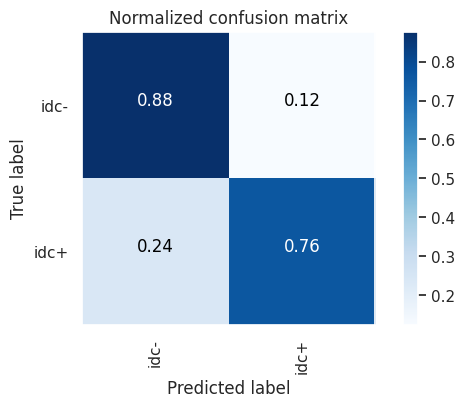

Epoch 54/60
9207/9207 [==============================] - 1309s 142ms/step - loss: 0.1858 - accuracy: 0.9243 - val_loss: 8.0888 - val_accuracy: 0.8964

Epoch 00054: val_accuracy did not improve from 0.90826
Predicting test data
1525/1525 [==============================] - 48s 31ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:48.012274


---------------------
| Balanced Accuracy  |
---------------------

    0.880766821278969


---------------------
|      Accuracy      |
---------------------

    0.8964174454828661


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.937069  0.916958  0.926904     17473
           1   0.801178  0.844576  0.822305      6923

    accuracy                       0.896417     24396
   macro avg   0.869124  0.880767  0.874605     24396
weighted avg   0.898506  0.896417  0.897221     24396

--------------------
| Confusion Matrix |
--------------------

 [[1602

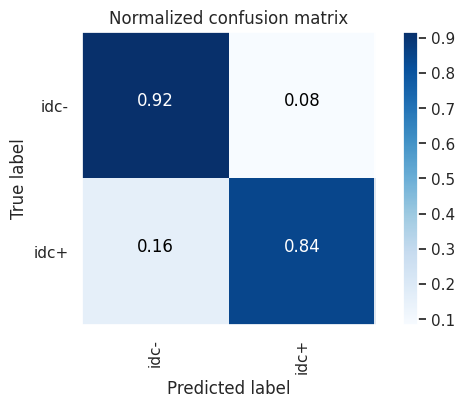

Epoch 55/60
9207/9207 [==============================] - 1361s 148ms/step - loss: 0.1840 - accuracy: 0.9245 - val_loss: 0.6877 - val_accuracy: 0.9037

Epoch 00055: val_accuracy did not improve from 0.90826
Predicting test data
1525/1525 [==============================] - 54s 35ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:54.110349


---------------------
| Balanced Accuracy  |
---------------------

    0.882240976170585


---------------------
|      Accuracy      |
---------------------

    0.9037137235612396


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.933551  0.931895  0.932722     17473
           1   0.828875  0.832587  0.830727      6923

    accuracy                       0.903714     24396
   macro avg   0.881213  0.882241  0.881725     24396
weighted avg   0.903847  0.903714  0.903779     24396

--------------------
| Confusion Matrix |
--------------------

 [[1628

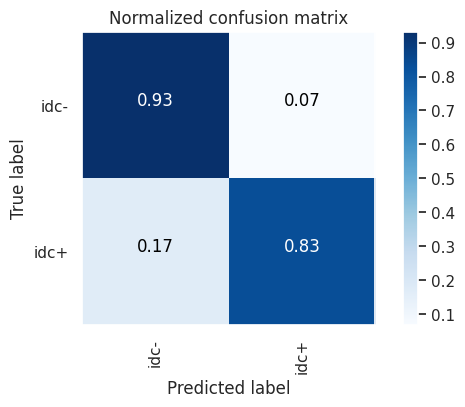

Epoch 56/60
9207/9207 [==============================] - 1415s 154ms/step - loss: 0.1837 - accuracy: 0.9245 - val_loss: 24.6691 - val_accuracy: 0.8646

Epoch 00056: val_accuracy did not improve from 0.90826
Predicting test data
1525/1525 [==============================] - 40s 26ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:40.075969


---------------------
| Balanced Accuracy  |
---------------------

    0.8540981811032377


---------------------
|      Accuracy      |
---------------------

    0.8646499426135432


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.928671  0.878498  0.902888     17473
           1   0.730139  0.829698  0.776741      6923

    accuracy                       0.864650     24396
   macro avg   0.829405  0.854098  0.839815     24396
weighted avg   0.872332  0.864650  0.867091     24396

--------------------
| Confusion Matrix |
--------------------

 [[15

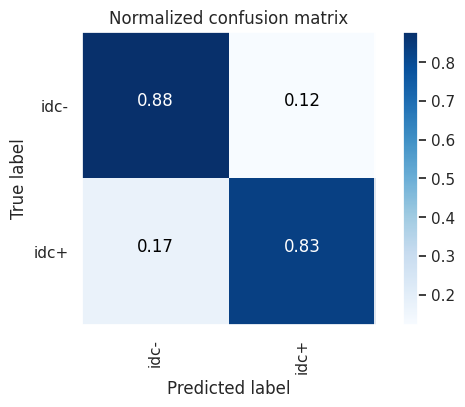

Epoch 57/60
9207/9207 [==============================] - 1150s 125ms/step - loss: 0.1825 - accuracy: 0.9256 - val_loss: 131.3541 - val_accuracy: 0.8529

Epoch 00057: val_accuracy did not improve from 0.90826
Predicting test data
1525/1525 [==============================] - 39s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:38.758377


---------------------
| Balanced Accuracy  |
---------------------

    0.8493168746788704


---------------------
|      Accuracy      |
---------------------

    0.852803738317757


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.931654  0.857380  0.892975     17473
           1   0.700337  0.841254  0.764355      6923

    accuracy                       0.852804     24396
   macro avg   0.815995  0.849317  0.828665     24396
weighted avg   0.866012  0.852804  0.856476     24396

--------------------
| Confusion Matrix |
--------------------

 [[14

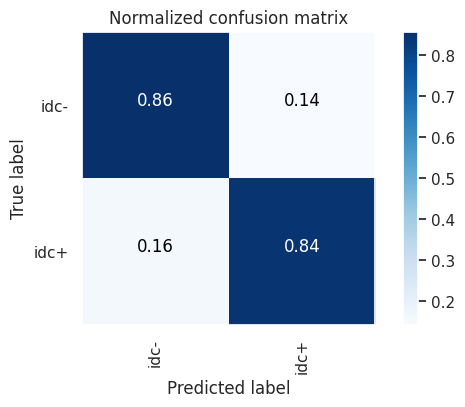

Epoch 58/60
9207/9207 [==============================] - 1132s 123ms/step - loss: 0.1810 - accuracy: 0.9263 - val_loss: 5.5124 - val_accuracy: 0.9027

Epoch 00058: val_accuracy did not improve from 0.90826
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:38.412533


---------------------
| Balanced Accuracy  |
---------------------

    0.8897524022102188


---------------------
|      Accuracy      |
---------------------

    0.9027299557304476


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.943023  0.919762  0.931247     17473
           1   0.809355  0.859743  0.833789      6923

    accuracy                       0.902730     24396
   macro avg   0.876189  0.889752  0.882518     24396
weighted avg   0.905091  0.902730  0.903591     24396

--------------------
| Confusion Matrix |
--------------------

 [[160

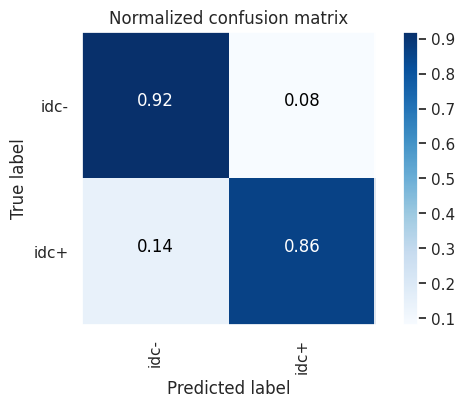

Epoch 59/60
9207/9207 [==============================] - 1143s 124ms/step - loss: 0.1783 - accuracy: 0.9270 - val_loss: 10.3056 - val_accuracy: 0.8983

Epoch 00059: val_accuracy did not improve from 0.90826
Predicting test data
1525/1525 [==============================] - 54s 35ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:53.574596


---------------------
| Balanced Accuracy  |
---------------------

    0.8783478893611545


---------------------
|      Accuracy      |
---------------------

    0.8982620101656009


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.932941  0.924398  0.928649     17473
           1   0.813497  0.832298  0.822790      6923

    accuracy                       0.898262     24396
   macro avg   0.873219  0.878348  0.875720     24396
weighted avg   0.899045  0.898262  0.898609     24396

--------------------
| Confusion Matrix |
--------------------

 [[16

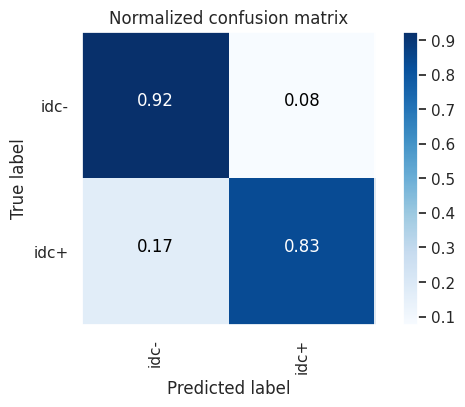

Epoch 60/60
9207/9207 [==============================] - 1100s 119ms/step - loss: 0.1776 - accuracy: 0.9274 - val_loss: 3.2846 - val_accuracy: 0.8985

Epoch 00060: val_accuracy did not improve from 0.90826
Predicting test data
1525/1525 [==============================] - 48s 31ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:47.975550


---------------------
| Balanced Accuracy  |
---------------------

    0.8881718203489937


---------------------
|      Accuracy      |
---------------------

    0.8984669617970159


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.944352  0.911978  0.927883     17473
           1   0.795533  0.864365  0.828522      6923

    accuracy                       0.898467     24396
   macro avg   0.869943  0.888172  0.878203     24396
weighted avg   0.902121  0.898467  0.899687     24396

--------------------
| Confusion Matrix |
--------------------

 [[159

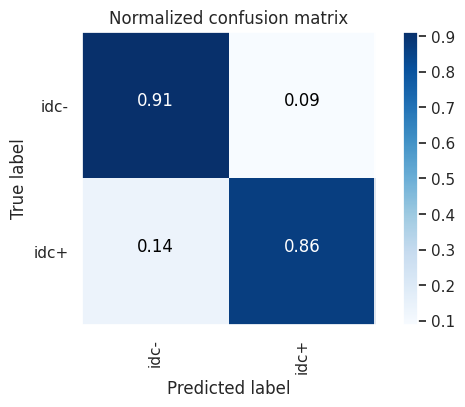

In [38]:
'''
#using augmentation data
history = model.fit_generator(train_generator, 
                              steps_per_epoch = len(train_data) // 16,
                              validation_data=val_generator,
                              validation_steps= len(test_data)// 16,
                              class_weight =class_weights,
                              epochs = 70,
                              callbacks = get_callbacks(),
                              verbose = 1
                              )
#using raw data
history = model.fit_generator(train_data_label, 
                              steps_per_epoch = epoch_step,
                              validation_data=train_val_data,
                              epochs = 70,
                              validation_steps= val_step, 
                              class_weight =class_weights,
                              callbacks = get_callbacks(),
                              verbose = 1
                              )


epoch_step = (len(train_data) // 16)
print(epoch_step)
val_step=len(test_data)// 16
print(val_step)
train_val_data=(test_data, test_label)
#print(train_generator.shape)
train_data_label=(train_data,train_label)
#print(val_generator.shape)
#(self, generator, steps_per_epoch, epochs, verbose, callbacks, validation_data, validation_steps, validation_freq, class_weight, max_queue_size, workers, use_multiprocessing, shuffle, initial_epoch)

history = model.fit_generator( 
                        train_datagen.flow(train_data,train_label),
                        steps_per_epoch=epoch_step,
                        epochs = 70,
                        verbose = 1,
                        callbacks = get_callbacks(),
                        validation_data=(test_data,test_label),
                        validation_steps = val_step,
                        class_weight =weights
                        )

'''
#from keras.models import load_model
#model.load_weights('/kaggle/input/covxnet-oversample/221227 120000 train 1 aug 2 train.h5')
#print("load weight success")
model.trainable=True

history = model.fit_generator(train_generator,
                              steps_per_epoch = len(train_data) // 16,
                              validation_data=val_generator,
                              validation_steps= len(test_data)// 16,
                              epochs = epoch_4_test,
                              callbacks = get_callbacks(),
                              verbose = 1
                              )

# Loading Best Model

In [39]:
from keras.models import load_model
#best_model = load_model('./best_model_multiclass_128.h5')
model1 = load_model('./best_model_multiclass_128.h5', compile=False)

# Best Model Performance
def test_final_model(model, train_generator, test_generator, val_generator, y_train, y_test, y_val, class_labels, cm_normalize=True, \
                 print_cm=True):

analyse of best model
VAL kappa
0.7714264519556092
analyse 1st model
report of val data
              precision    recall  f1-score   support

           0   0.925920  0.948740  0.937191     39602
           1   0.861848  0.808168  0.834146     15670

    accuracy                       0.908887     55272
   macro avg   0.893884  0.878454  0.885669     55272
weighted avg   0.907756  0.908887  0.907977     55272



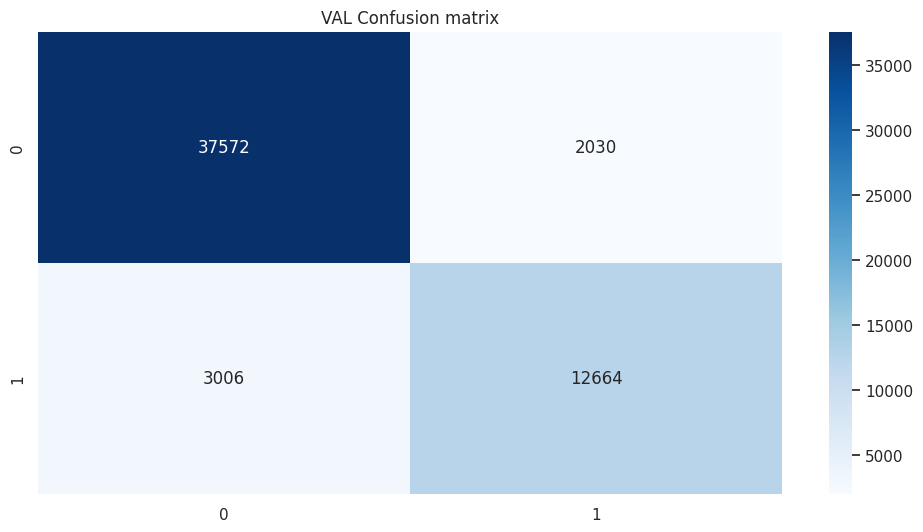

In [40]:
import sklearn
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix
#---------------
from keras.models import load_model

#model1 = load_model('./best_model_multiclass_128.h5', compile=False)
print("analyse of best model")


cf_matrix_val = confusion_matrix(
    np.concatenate([np.argmax(val2_generator[i][1], axis=1) for i in range(len(val2_generator))]),    
    np.argmax(model1.predict_generator(val2_generator, steps=len(val2_generator)), axis=1) 
)

plt.figure(figsize = (12, 6))
sns.heatmap(cf_matrix_val, annot=True, cmap='Blues', fmt='g')
plt.title("VAL Confusion matrix")
# kappa VAL
kappa_val = cohen_kappa_score(
    np.concatenate([np.argmax(val2_generator[i][1], axis=1) for i in range(len(val2_generator))]),    
    np.argmax(model1.predict_generator(val2_generator, steps=len(val2_generator)), axis=1) 
)
print("VAL kappa")
print(kappa_val)



print("analyse 1st model")
print("report of val data")
report = sklearn.metrics.classification_report(
    np.concatenate([np.argmax(val2_generator[i][1], axis=1) for i in range(len(val2_generator))]),    
    np.argmax(model1.predict_generator(val2_generator, steps=len(val2_generator)), axis=1) , digits=6
)
print(report)

report of test data
              precision    recall  f1-score   support

           0  0.9236416 0.9504950 0.9368760     17473
           1  0.8651598 0.8016756 0.8322087      6923

    accuracy                      0.9082636     24396
   macro avg  0.8944007 0.8760853 0.8845423     24396
weighted avg  0.9070459 0.9082636 0.9071739     24396

TEST kappa
0.769210625724817


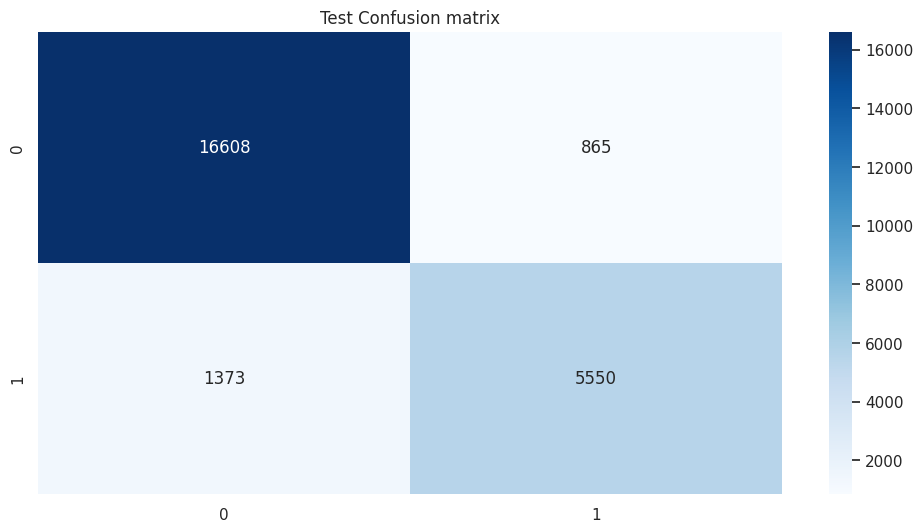

In [41]:
#------------------
cf_matrix_test = confusion_matrix(
    np.concatenate([np.argmax(val_generator[i][1], axis=1) for i in range(len(val_generator))]),    
    np.argmax(model1.predict_generator(val_generator, steps=len(val_generator)), axis=1) 
)

plt.figure(figsize = (12, 6))
sns.heatmap(cf_matrix_test, annot=True, cmap='Blues', fmt='g')
plt.title("Test Confusion matrix")



print("report of test data")
import sklearn

report = sklearn.metrics.classification_report(
    np.concatenate([np.argmax(val_generator[i][1], axis=1) for i in range(len(val_generator))]),    
    np.argmax(model1.predict_generator(val_generator, steps=len(val_generator)), axis=1) , digits=7
)
print(report)


# kappa TEST
kappa_test = cohen_kappa_score(
    np.concatenate([np.argmax(val_generator[i][1], axis=1) for i in range(len(val_generator))]),    
    np.argmax(model1.predict_generator(val_generator, steps=len(val_generator)), axis=1)
)
print("TEST kappa")
print(kappa_test)

roc analysis of test dataset


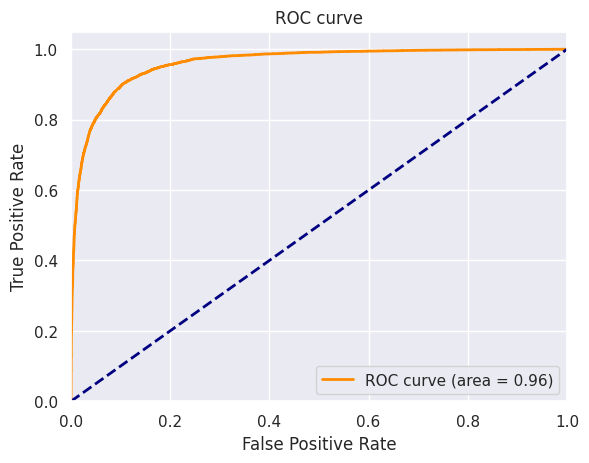

auc value
0.9608922262092424


In [42]:
print("roc analysis of test dataset")
#y_score = model1.predict_proba(test_label)
y_score = model1.predict_generator(val_generator)
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 2 # number of class




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_label[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_label.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# The process of drawing a roc-auc curve belonging to a specific class

plt.figure()
lw = 2 # line_width
no_class=1
plt.plot(fpr[no_class], tpr[no_class], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[no_class]) # Drawing Curve according to 1. class 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
roc_auc = auc(fpr[no_class], tpr[no_class])
print("auc value")
print(roc_auc)

roc analysis of validation dataset


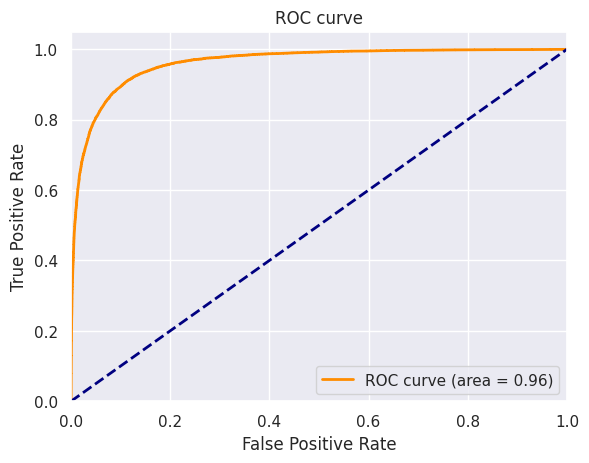

auc value
0.9613423780399273


In [43]:
print("roc analysis of validation dataset")
#y_score = model1.predict_proba(test_label)
y_score = model1.predict_generator(val2_generator)
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 2 # number of class




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(val_label[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(val_label.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# The process of drawing a roc-auc curve belonging to a specific class

plt.figure()
lw = 2 # line_width
no_class=1
plt.plot(fpr[no_class], tpr[no_class], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[no_class]) # Drawing Curve according to 1. class 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
roc_auc = auc(fpr[no_class], tpr[no_class])
print("auc value")
print(roc_auc)

3455/3455 [==============================] - 91s 26ms/step
validation auc
0.8784542187103738
validation roc


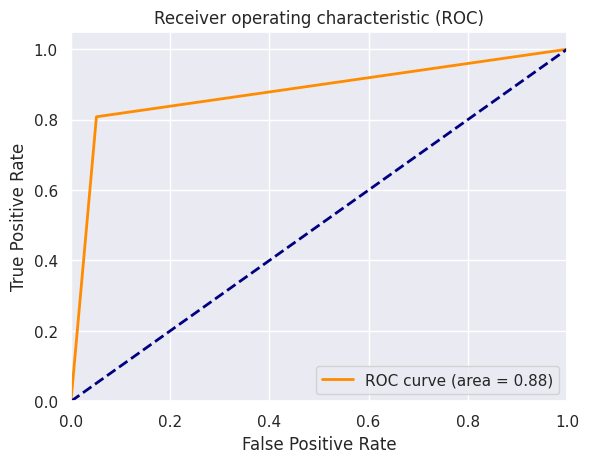

In [44]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve

y_pred_keras= model1.predict_generator(val2_generator,verbose=1)
#.ravel()
y_pred_keras=np.argmax(y_pred_keras,axis=1)
#print(y_pred_keras2)
#print(len(y_pred_keras2))

val_label2=np.argmax(val_label, axis=1)
#print(test_label2)
#print(len(test_label2))

#fpr_keras, tpr_keras, thresholds_keras = roc_curve(val_label2, y_pred_keras)

from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(val_label2, y_pred_keras
                                 #, pos_label=9
                                )
roc_auc = auc(fpr, tpr)
print("validation auc")
print(roc_auc)

print("validation roc")
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

1525/1525 [==============================] - 42s 28ms/step
test auc
0.8760853118389983
test roc


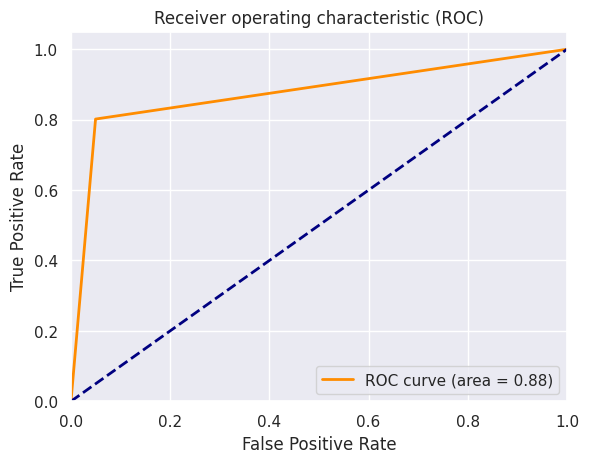

In [45]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve

y_pred_keras2= model1.predict_generator(val_generator,verbose=1)
#.ravel()
y_pred_keras2=np.argmax(y_pred_keras2,axis=1)
#print(y_pred_keras2)
#print(len(y_pred_keras2))

test_label2=np.argmax(test_label, axis=1)
#print(test_label2)
#print(len(test_label2))

fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_label2, y_pred_keras2)

from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(test_label2, y_pred_keras2
                                 #, pos_label=9
                                )
roc_auc = auc(fpr, tpr)
print("test auc")
print(roc_auc)
print("test roc")
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [46]:
'''

#must use train_label1 as train_label went through a shuffle in image-data-generator
test_final_model(best_model, train_generator, 
               val_generator, val2_generator, 
               np.argmax(train_label1, axis=1),
               np.argmax(test_label, axis=1),
               np.argmax(val_label, axis=1), 
               class_labels = ['idc-', 'idc+'])
               '''

"\n\n#must use train_label1 as train_label went through a shuffle in image-data-generator\ntest_final_model(best_model, train_generator, \n               val_generator, val2_generator, \n               np.argmax(train_label1, axis=1),\n               np.argmax(test_label, axis=1),\n               np.argmax(val_label, axis=1), \n               class_labels = ['idc-', 'idc+'])\n               "

# Plotting EpochPlot

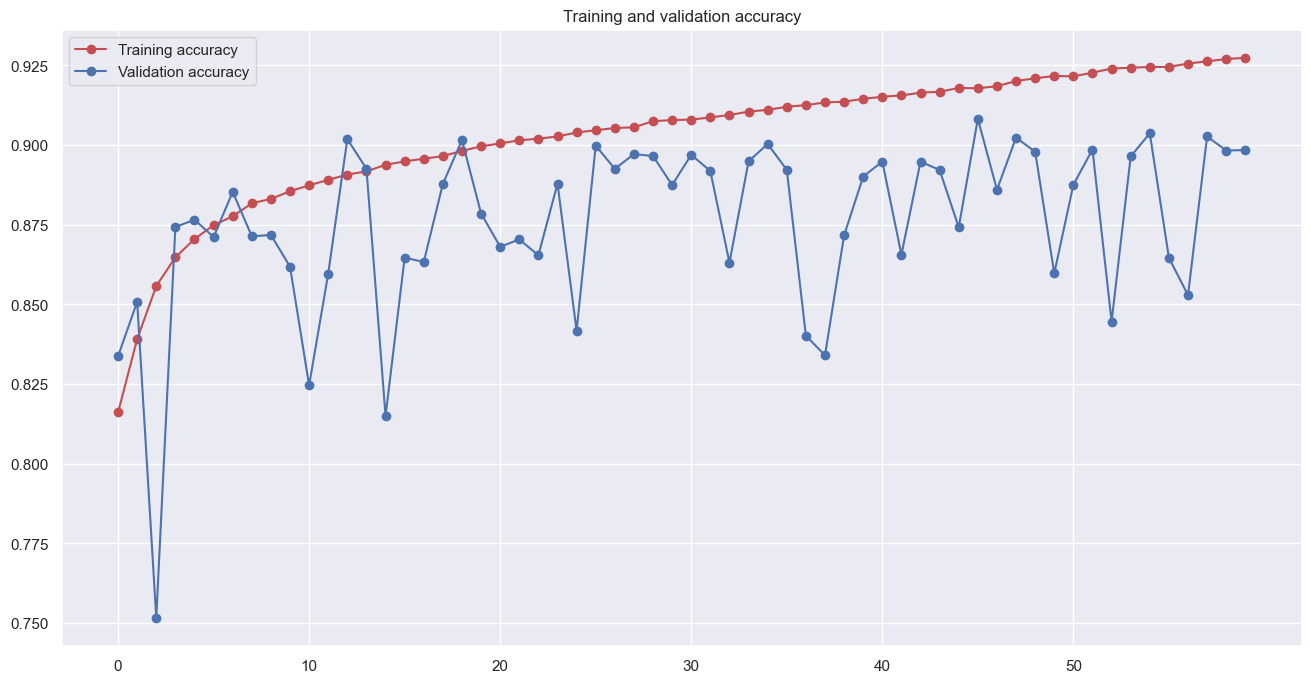

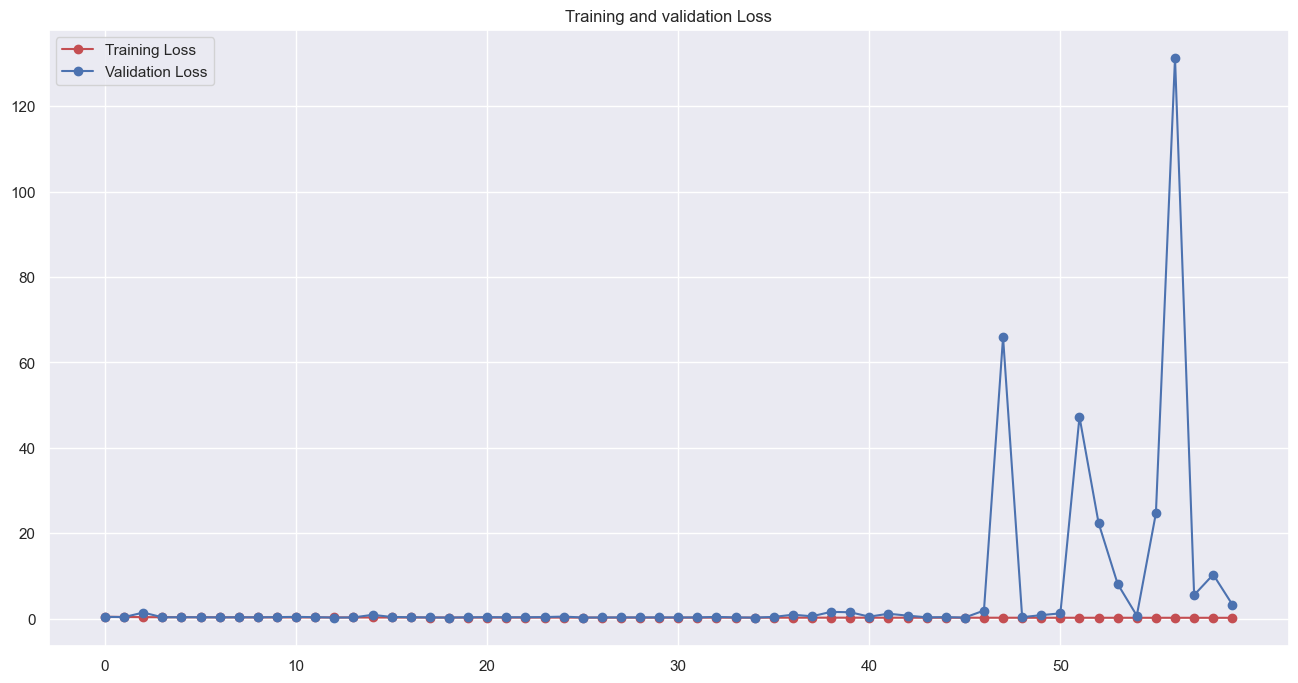

<Figure size 640x480 with 0 Axes>

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(0,len(acc))
fig = plt.gcf()
fig.set_size_inches(16, 8)

plt.plot(epochs, acc, 'r', label='Training accuracy',marker = "o")
plt.plot(epochs, val_acc, 'b', label='Validation accuracy',marker = "o")
plt.title('Training and validation accuracy')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
plt.figure()

fig = plt.gcf()
fig.set_size_inches(16, 8)
plt.plot(epochs, loss, 'r', label='Training Loss',marker = "o")
plt.plot(epochs, val_loss, 'b', label='Validation Loss',marker = "o")
plt.title('Training and validation Loss')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
#plt.savefig('Multiclass Model .png')
plt.figure()
plt.show()


In [ ]:
#print(y_test)

from sklearn.cross_validation import train_test_split# Grad-CAM and Saliency Map 
coming soon....